In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
import numpy as np
import pandas as pd
import pandas_profiling

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 22})


import seaborn as sns
from sklearn import metrics, preprocessing, svm
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve, auc, recall_score, precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix, average_precision_score,recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline
Image(url= "Capture.JPG")

In [2]:
Image(url="Capture2.JPG")

Dictionary on DataSet of Titanic.

survival: Survival (0 = no; 1 = yes)

class: Passenger class (1 = first; 2 = second; 3 = third)

name: Name

sex: Sex

age: Age

sibsp: Number of siblings/spouses aboard

parch: Number of parents/children aboard

ticket: Ticket number

fare: Passenger fare

cabin: Cabin

embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat: Lifeboat (if survived)

body: Body number (if did not survive and body was recovered)


In [3]:
Image(url="Capture1.JPG")

In [4]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [5]:
titanicData = pd.read_excel('titanic.xls', index_col=None, na_values=['NA'])

In [6]:
titanicData.sample(10)
titanicData.info()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1008,3,0,"McGowan, Miss. Katherine",female,35.0,0,0,9232,7.750,NaN,Q,NaN,NaN,NaN
98,1,1,"Douglas, Mrs. Walter Donald (Mahala Dutton)",female,48.0,1,0,PC 17761,106.425,C86,C,2,NaN,"Deephaven, MN / Cedar Rapids, IA"
720,3,0,"Colbert, Mr. Patrick",male,24.0,0,0,371109,7.250,NaN,Q,NaN,NaN,"Co Limerick, Ireland Sherbrooke, PQ"
615,3,0,"Alhomaki, Mr. Ilmari Rudolf",male,20.0,0,0,SOTON/O2 3101287,7.925,NaN,S,NaN,NaN,"Salo, Finland Astoria, OR"
472,2,0,"Kirkland, Rev. Charles Leonard",male,57.0,0,0,219533,12.350,NaN,Q,NaN,NaN,"Glasgow / Bangor, ME"
745,3,1,"Daly, Miss. Margaret Marcella ""Maggie""",female,30.0,0,0,382650,6.950,NaN,Q,15,NaN,"Co Athlone, Ireland New York, NY"
570,2,1,"Toomey, Miss. Ellen",female,50.0,0,0,F.C.C. 13531,10.500,NaN,S,9,NaN,"Indianapolis, IN"
54,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
55,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.000,B96 B98,S,4,NaN,"Bryn Mawr, PA"
406,2,0,"Faunthorpe, Mr. Harry",male,40.0,1,0,2926,26.000,NaN,S,NaN,286.0,"England / Philadelphia, PA"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


# Exploratory Data Analysis

In [7]:
pandas_profiling.ProfileReport(titanicData)

Number of variables,14
Number of observations,1309
Total Missing (%),21.0%
Total size in memory,143.2 KiB
Average record size in memory,112.1 B
Numeric,6
Categorical,7
Boolean,1
Date,0
Text (Unique),0
Rejected,0


In [8]:
titanicData.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


# Data Visualization

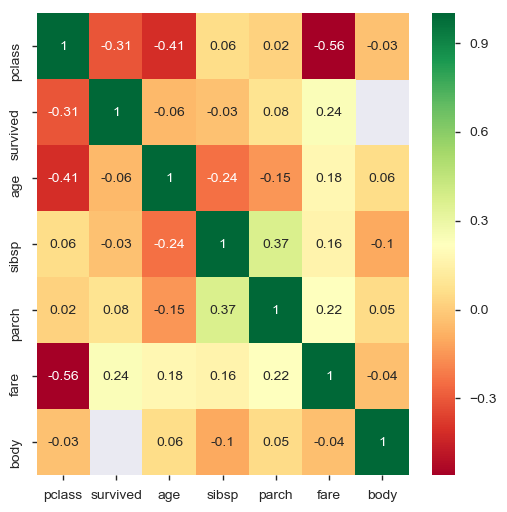

In [9]:
# compute the pair wise correlation for all columns  
correlation_matrix = titanicData.corr().round(2)
plt.subplots(figsize=(6,6))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)
plt.show();

In [10]:
#List of columns of titanicData
titanicData.columns
titanicData.shape

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

(1309, 14)

## % of the Survived on overall population

In [11]:
#let’s examine the overall chance of survival for a Titanic passenger.
titanicData['survived'].mean()

0.3819709702062643

The calculation shows that only 38% of the passengers survived. Not the best odds. The reason for this massive loss of life is that the Titanic was only carrying 20 lifeboats, which was not nearly enough for the 1,309 passengers and 885 crew members aboard. It seems unlikely that all of the passengers would have had equal chances at survival, so we will continue breaking down the data to examine the social dynamics that determined who got a place on a lifeboat and who did not.

In [12]:
#To get a view into the composition of each class, we can group data by class, and view the averages for each column:
titanicData.groupby('pclass').mean()

,survived,age,sibsp,parch,fare,body
pclass,,,,,,
1,0.619195,39.159918,0.436533,0.365325,87.508992,162.828571
2,0.429603,29.506705,0.393502,0.368231,21.179196,167.387097
3,0.255289,24.816367,0.568406,0.400564,13.302889,155.818182


For instance, passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class. Additionally, the lower classes generally consisted of younger people, and the ticket prices for first class were predictably much higher than those for second and third class.

In [13]:
#Replacing pclass 1,2,3 with 1 = first; 2 = second; 3 = third
titanicData['pclass'] = titanicData['pclass'].replace(1,'First')
titanicData['pclass'] = titanicData['pclass'].replace(2,'Second')
titanicData['pclass'] = titanicData['pclass'].replace(3,'Third')

Counts of Labels


pclass
First     323
Second    277
Third     709
dtype: int64

([<matplotlib.patches.Wedge at 0x1500054fc88>,
 [Text(-0.7698434129518064, 0.7857105825523254, 'First Class'),
  Text(-0.8794073890389915, -0.6607894097998425, 'Second Class'),
  Text(1.0906037034666365, -0.1434697249765856, 'Third Class')],
 [Text(-0.4199145888828035, 0.4285694086649047, '24.7%'),
  Text(-0.4796767576576316, -0.36043058716355036, '21.2%'),
  Text(0.594874747345438, -0.07825621362359214, '54.2%')])

Text(0.5, 1.0, '% of Pclass')

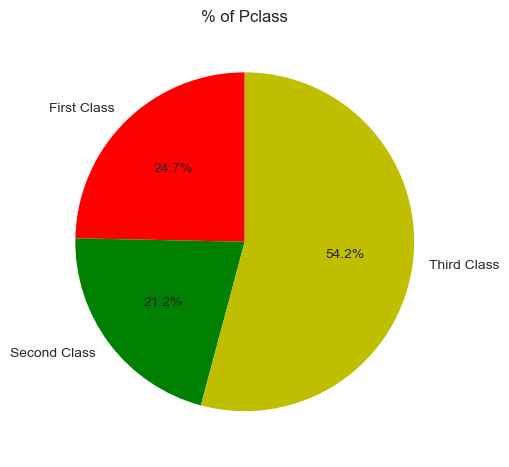

In [14]:
print('Counts of Labels')
class_group = titanicData.groupby("pclass").size()
class_group
plt.pie(class_group, 
        labels=['First Class', 'Second Class','Third Class'],
        colors= ['r', 'g','y'], 
        startangle=90, 
        autopct='%.1f%%')
plt.title('% of Pclass')
plt.show()

In [15]:
#Replacing embarked S,C, Q (C = Cherbourg; Q = Queenstown; S = Southampton)
titanicData['embarked'] = titanicData['embarked'].replace('C','Cherbourg')
titanicData['embarked'] = titanicData['embarked'].replace('S','Southampton')
titanicData['embarked'] = titanicData['embarked'].replace('Q','Queenstown')

([<matplotlib.patches.Wedge at 0x1500046dfd0>,
 [Text(-0.6648203139754177, 0.8763640511372127, 'Cherbourg'),
  Text(-1.0997132259954454, -0.02511614163621795, 'Queenstown'),
  Text(0.8913152810889765, -0.6446371612754566, 'Southampton')],
 [Text(-0.3626292621684097, 0.4780167551657523, '20.7%'),
  Text(-0.5998435778156974, -0.013699713619755244, '9.4%'),
  Text(0.48617197150307806, -0.3516202697866126, '69.9%')])

Text(0.5, 1.0, '% of Embarked')

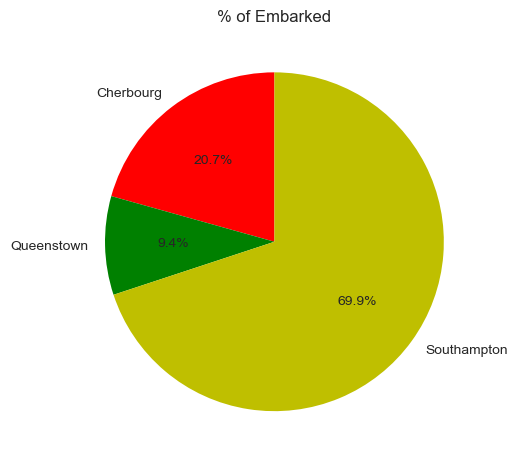

In [16]:
plt.pie(titanicData.groupby("embarked").size(), 
        labels=['Cherbourg', 'Queenstown','Southampton'],
        colors= ['r', 'g','y'], 
        startangle=90, 
        autopct='%.1f%%')
plt.title('% of Embarked')
plt.show()

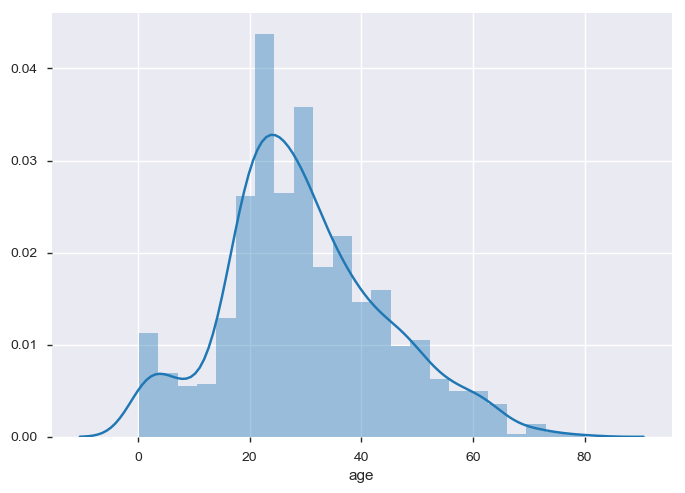

In [17]:
sns.distplot(titanicData.age.dropna())

In [18]:
#Now lets see by grouping function for both class and sex:
class_sex_grouping = titanicData.groupby(['pclass','sex']).mean()
class_sex_grouping

survived        age     sibsp     parch        fare        body
pclass sex                                                                    
First  female  0.965278  37.037594  0.555556  0.472222  109.412385         NaN
       male    0.340782  41.029250  0.340782  0.279330   69.888385  162.828571
Second female  0.886792  27.499191  0.500000  0.650943   23.234827   52.000000
       male    0.146199  30.815401  0.327485  0.192982   19.904946  171.233333
Third  female  0.490741  22.185307  0.791667  0.731481   15.324250  183.000000
       male    0.152130  25.962273  0.470588  0.255578   12.415462  151.854167

In [19]:
pd.crosstab(titanicData['sibsp'],titanicData['survived']).style.background_gradient('summer_r')

survived,0,1
sibsp,,
0,582,309
1,156,163
2,23,19
3,14,6
4,19,3
5,6,0
8,9,0


sibsip feature indicates that whether a person is alone or with his family. Siblings=brother,sister, etc and Spouse= husband,wife

Text(0.5, 1.0, 'SipSp vs Survived in BarPlot')

Text(0.5, 1.0, 'SibSp vs Survived in FactorPlot')

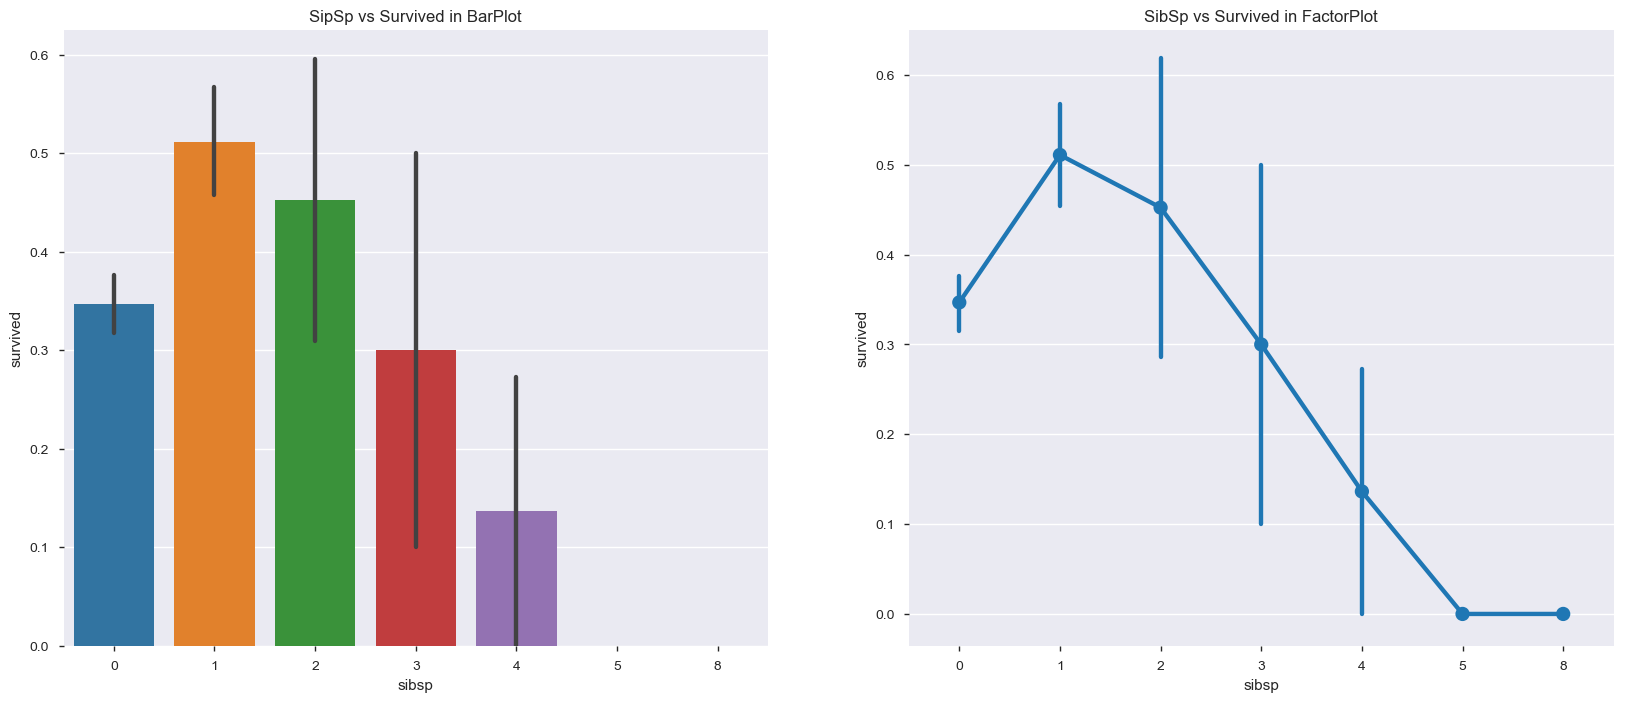

In [20]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('sibsp','survived', data=titanicData,ax=ax[0])
ax[0].set_title('SipSp vs Survived in BarPlot')
sns.factorplot('sibsp','survived', data=titanicData,ax=ax[1])
ax[1].set_title('SibSp vs Survived in FactorPlot')
plt.close(2)
plt.show()

In [21]:
#Now lets see by grouping function for both class, survived and sex:
titanicData.pivot_table('survived', index='sex', columns='pclass')

pclass,First,Second,Third
sex,,,
female,0.965278,0.886792,0.490741
male,0.340782,0.146199,0.152130


In [22]:
# Based on the age group using survived, age, pclass and sex
age = pd.cut(titanicData['age'], [0,10,20,30,40,50,60,70,80])
titanicData.pivot_table('survived', ['sex', age], 'pclass')

pclass              First    Second     Third
sex    age                                   
female (0, 10]   0.000000  1.000000  0.482759
       (10, 20]  1.000000  0.937500  0.540541
       (20, 30]  0.969697  0.850000  0.471698
       (30, 40]  0.970588  0.950000  0.428571
       (40, 50]  0.956522  0.916667  0.272727
       (50, 60]  1.000000  0.500000       NaN
       (60, 70]  0.800000       NaN  1.000000
       (70, 80]  1.000000       NaN       NaN
male   (0, 10]   1.000000  1.000000  0.354839
       (10, 20]  0.428571  0.117647  0.128571
       (20, 30]  0.400000  0.081967  0.180556
       (30, 40]  0.437500  0.085714  0.161765
       (40, 50]  0.309524  0.055556  0.076923
       (50, 60]  0.318182  0.000000  0.000000
       (60, 70]  0.000000  0.166667  0.000000
       (70, 80]  0.333333       NaN  0.000000

In [23]:
# Based on the fare group using survived, fare, pclass, sex and age
fare = pd.qcut(titanicData['fare'],6)
titanicData.pivot_table('survived', ['sex', age], [fare, 'pclass'])

fare            (-0.001, 7.775]           (7.775, 8.662] (8.662, 14.454]  \
pclass                    First     Third          Third          Second   
sex    age                                                                 
female (0, 10]              NaN       NaN            NaN             NaN   
       (10, 20]             NaN  0.666667       0.600000        0.800000   
       (20, 30]             NaN  0.642857       0.333333        0.875000   
       (30, 40]             NaN  0.200000       0.000000        0.875000   
       (40, 50]             NaN  0.666667            NaN        1.000000   
       (50, 60]             NaN       NaN            NaN        0.000000   
       (60, 70]             NaN       NaN            NaN             NaN   
       (70, 80]             NaN       NaN            NaN             NaN   
male   (0, 10]              NaN  1.000000       1.000000             NaN   
       (10, 20]             NaN  0.055556       0.185185        0.181818   
       (20, 30]             NaN  0.235294       0.125000        0.100000   
       (30, 40]             0.0  0.111111       0.166667        0.111111   
       (40, 50]             1.0  0.000000       0.181818        0.125000   
       (50, 60]             NaN  0.000000       0.000000        0.000000   
       (60, 70]             NaN  0.000000            NaN        0.200000   
       (70, 80]             NaN  0.000000            NaN             NaN   

fare                      (14.454, 26.0]                     (26.0, 53.1]  \
pclass              Third          First    Second     Third        First   
sex    age                                                                  
female (0, 10]   0.571429            NaN  1.000000  0.642857          NaN   
       (10, 20]  0.571429            NaN  1.000000  0.333333     1.000000   
       (20, 30]  0.461538            NaN  0.750000  0.555556     1.000000   
       (30, 40]  0.250000            NaN  1.000000  0.750000     0.800000   
       (40, 50]  0.500000            1.0  0.750000  0.000000     0.800000   
       (50, 60]       NaN            1.0  0.666667       NaN     1.000000   
       (60, 70]  1.000000            NaN       NaN       NaN     1.000000   
       (70, 80]       NaN            NaN       NaN       NaN          NaN   
male   (0, 10]   0.600000            NaN  1.000000  0.625000          NaN   
       (10, 20]  0.222222            NaN  0.000000  0.125000     0.000000   
       (20, 30]  0.214286            0.0  0.000000  0.153846     0.500000   
       (30, 40]  0.200000            NaN  0.083333  0.111111     0.529412   
       (40, 50]  0.000000            0.0  0.000000  0.000000     0.333333   
       (50, 60]       NaN            NaN  0.000000       NaN     0.363636   
       (60, 70]       NaN            0.0  0.000000       NaN     0.000000   
       (70, 80]       NaN            NaN       NaN       NaN     0.333333   

fare                                (53.1, 512.329]               
pclass             Second     Third           First Second Third  
sex    age                                                        
female (0, 10]   1.000000  0.125000        0.000000    NaN   NaN  
       (10, 20]  1.000000  0.000000        1.000000    NaN   NaN  
       (20, 30]  1.000000  0.000000        0.964286    1.0   NaN  
       (30, 40]  1.000000  0.333333        1.000000    NaN   NaN  
       (40, 50]  1.000000  0.000000        1.000000    1.0   NaN  
       (50, 60]       NaN       NaN        1.000000    NaN   NaN  
       (60, 70]       NaN       NaN        0.750000    NaN   NaN  
       (70, 80]       NaN       NaN        1.000000    NaN   NaN  
male   (0, 10]   1.000000  0.062500        1.000000    NaN   NaN  
       (10, 20]  0.000000  0.000000        0.600000    0.0   0.0  
       (20, 30]  0.142857       NaN        0.388889    0.0   0.5  
       (30, 40]  0.000000  0.000000        0.454545    0.0   1.0  
       (40, 50]  0.000000       NaN        0.312500    0.0   NaN  
       (50, 60]  0.

In [24]:
# using pivot table with survived, fare, pclass, sex and age
titanicData.pivot_table(index='sex', columns='pclass',aggfunc={'survived':sum, 'fare':'mean'})

fare                       survived             
pclass       First     Second      Third    First Second Third
sex                                                           
female  109.412385  23.234827  15.324250      139     94   106
male     69.888385  19.904946  12.415462       61     25    75

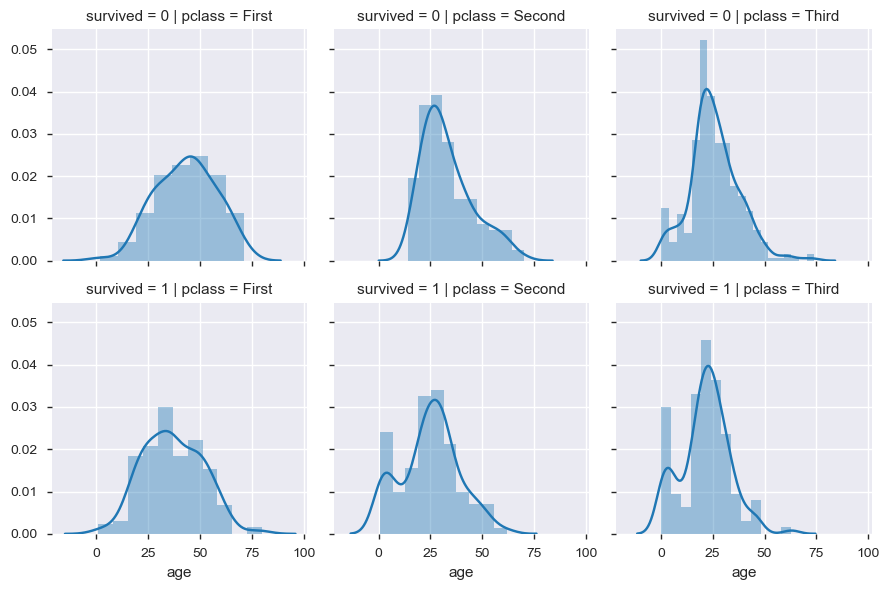

In [25]:
#Survived with pclass and age
g = sns.FacetGrid(titanicData, row='survived', col='pclass')
g.map(sns.distplot, "age")
plt.show()

Based on above pivot table we can clearly see majorly females were servived while comparing to males accross the age groups. Also the ratio of survival was more on pclass 1 comparing to other classes

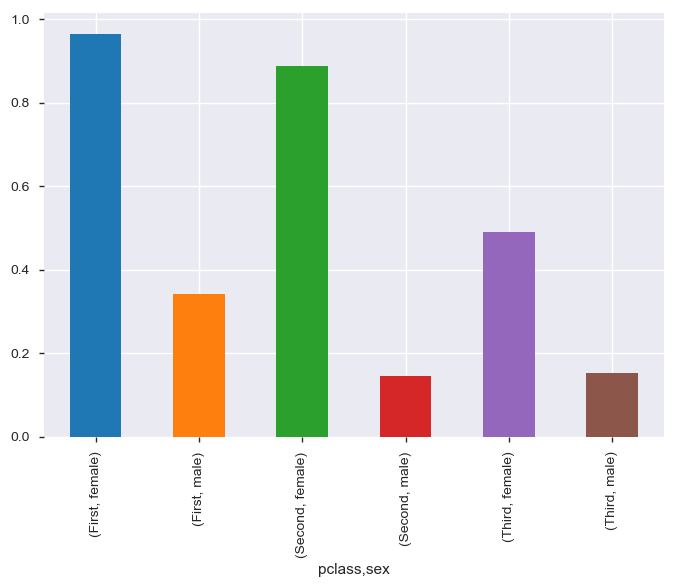

In [26]:
class_sex_grouping['survived'].plot.bar()

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Sex')

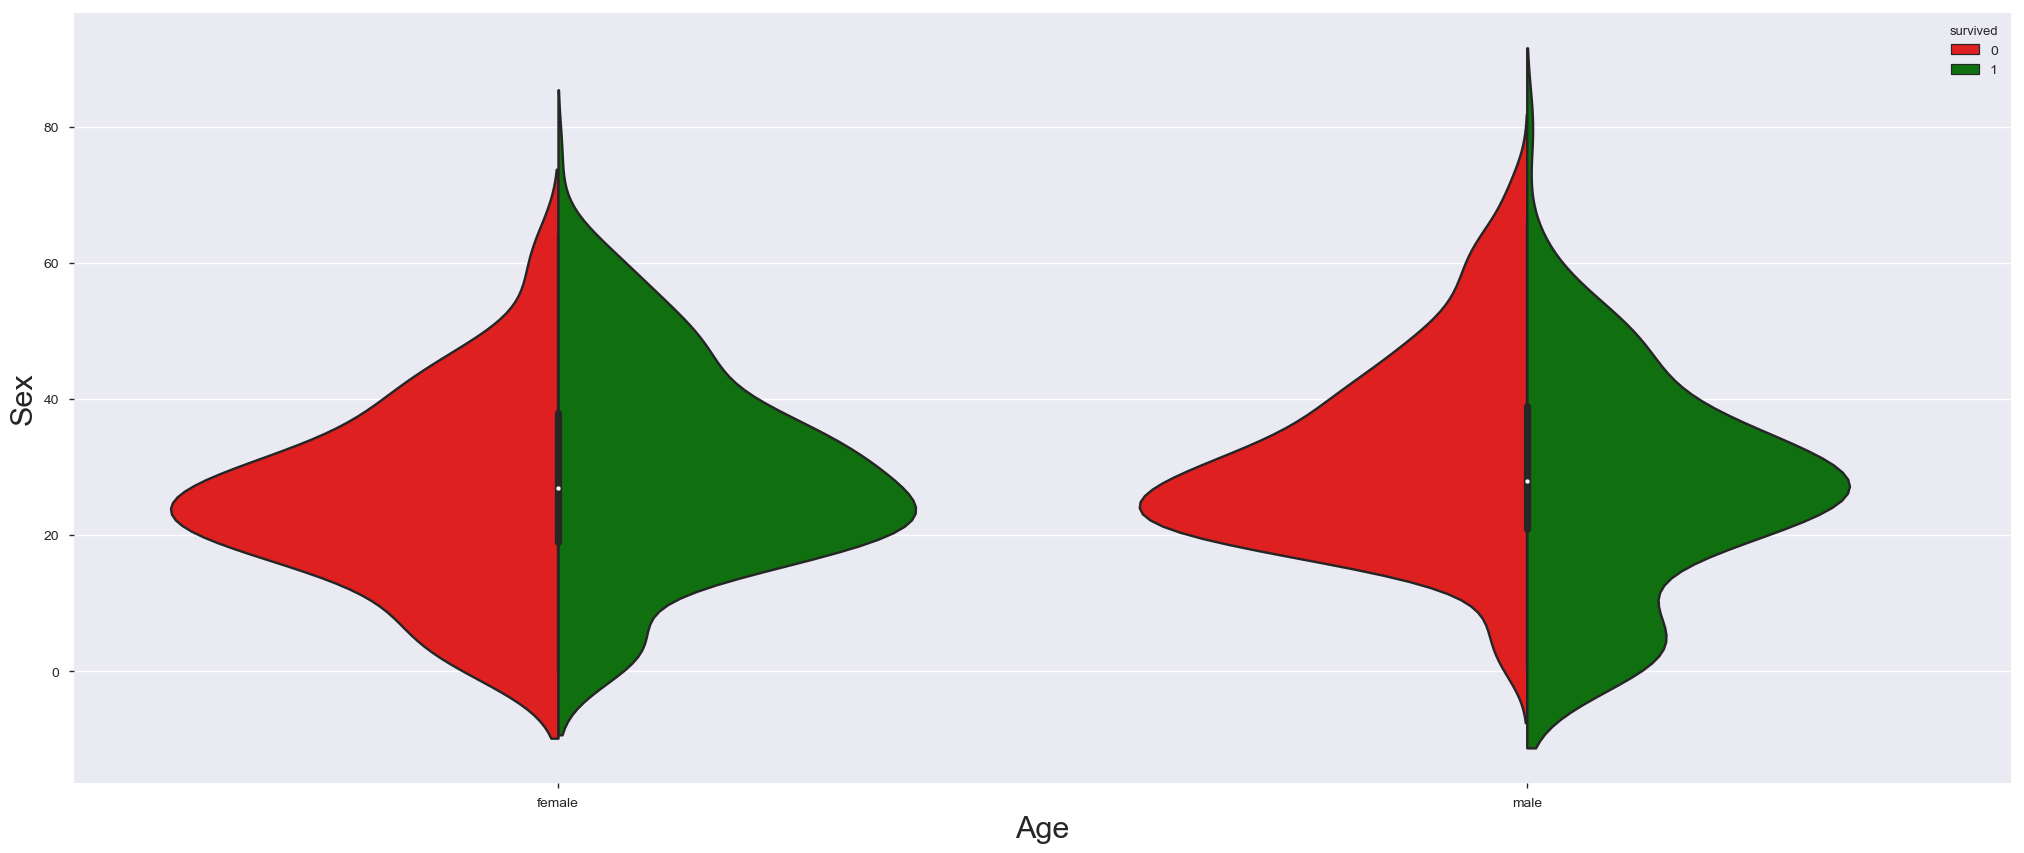

In [27]:
fig = plt.figure(figsize=(25, 10))
sns.violinplot(x='sex', y='age', 
               hue='survived', data=titanicData, 
               split=True,
               palette={0: "r", 1: "g"}
              );
plt.xlabel('Age',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Sex',{'fontname':'Arial', 'size':'22'})
plt.show()

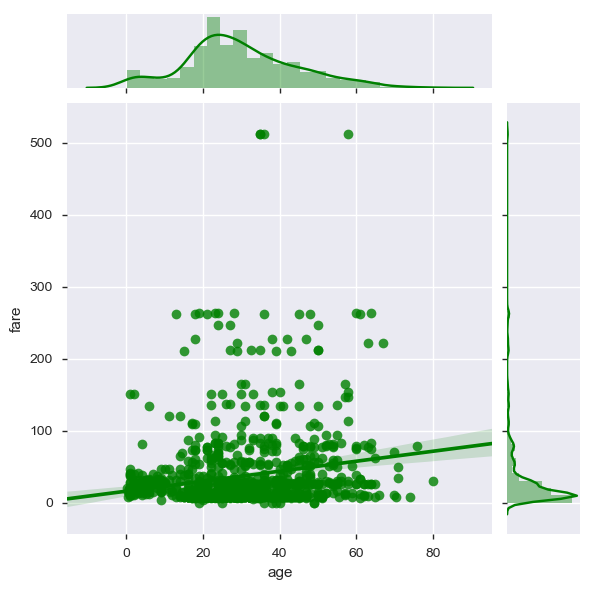

In [28]:
sns.jointplot(data=titanicData, x='age', y='fare', kind='reg', color='g')
plt.show()

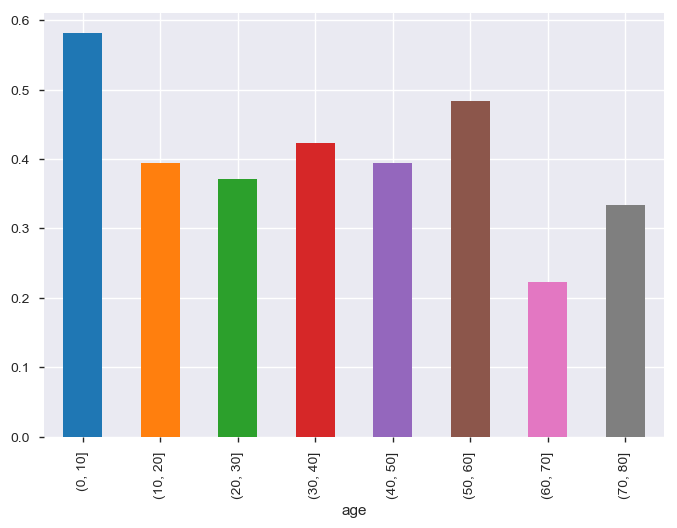

In [29]:
#Plot graph for survived passengers by grouping them with age
group_by_age = pd.cut(titanicData["age"], np.arange(0, 90, 10))
age_grouping = titanicData.groupby(group_by_age).mean()
age_grouping['survived'].plot.bar()

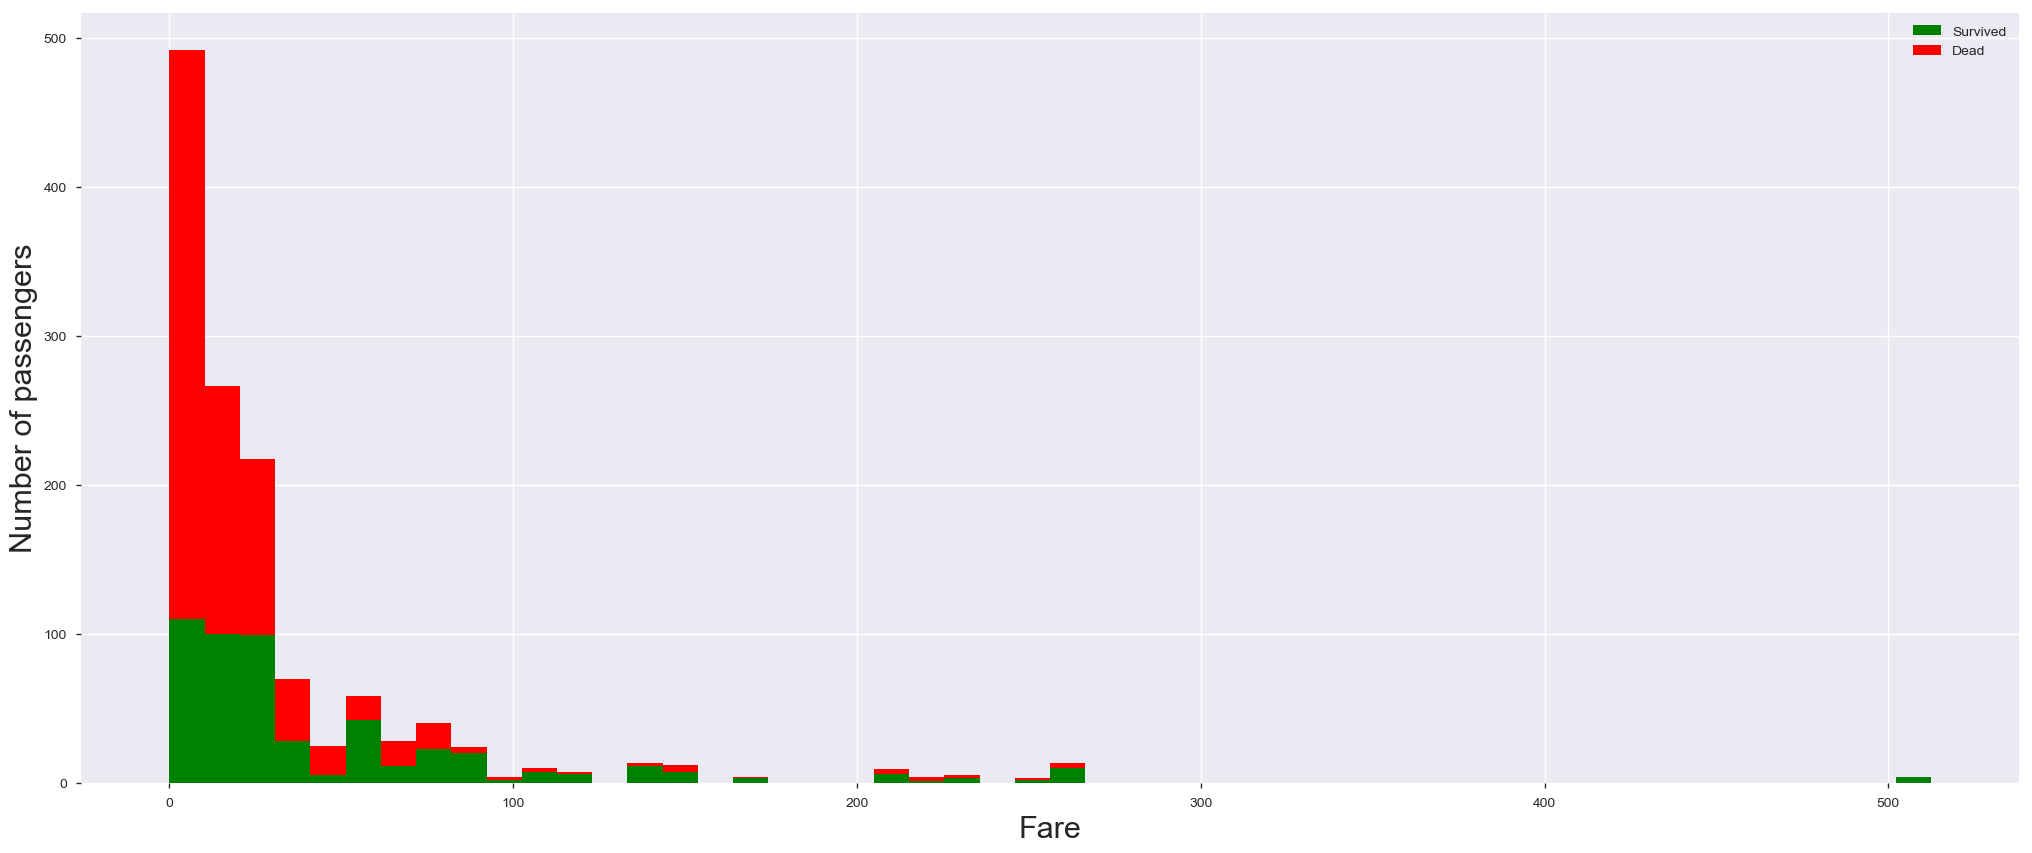

In [30]:
#now focus on the Fare ticket of each passenger and see how it could impact the survival.
figure = plt.figure(figsize=(25, 10))
plt.hist([titanicData[titanicData['survived'] == 1]['fare'], titanicData[titanicData['survived'] == 0]['fare']], 
         stacked=True, color = ['g','r'],
         bins = 50, label = ['Survived','Dead'])
plt.xlabel('Fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Number of passengers',{'fontname':'Arial', 'size':'22'})
plt.legend();

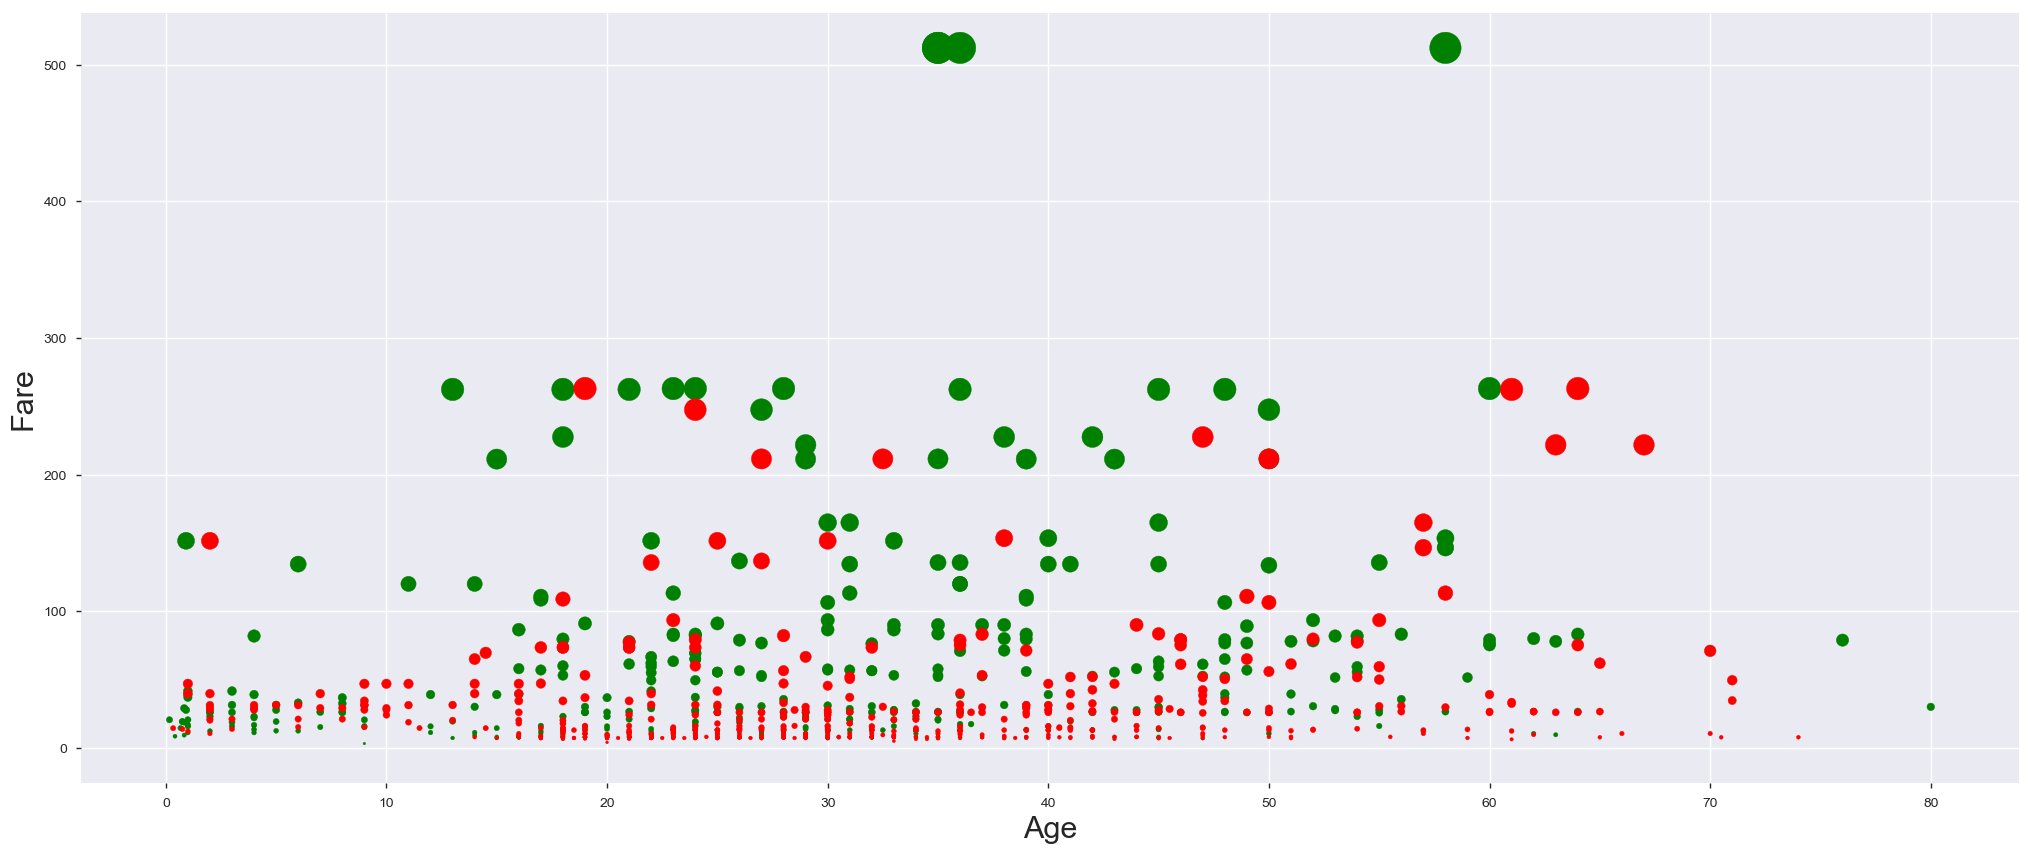

In [31]:
#now combine the age, the fare and the survival on a single chart.
plt.figure(figsize=(25, 10))
ax = plt.subplot()
plt.xlabel('Age',{'fontname':'Arial', 'size':'22'})
plt.ylabel('Fare',{'fontname':'Arial', 'size':'22'})
ax.scatter(titanicData[titanicData['survived'] == 1]['age'], titanicData[titanicData['survived'] == 1]['fare'], 
           c='green', s=titanicData[titanicData['survived'] == 1]['fare'])
ax.scatter(titanicData[titanicData['survived'] == 0]['age'], titanicData[titanicData['survived'] == 0]['fare'], 
           c='red', s=titanicData[titanicData['survived'] == 0]['fare']);

The size of the circles is proportional to the ticket fare.
- the x-axis, we have the ages 
- the y-axis, we consider the ticket fare.

We can observe different clusters:
- Large green dots between x=20 and x=45: adults with the largest ticket fares
- Small red dots between x=10 and x=45, adults from lower classes on the boat
- Small greed dots between x=0 and x=7: these are the children that were saved

Text(0.5, 0, 'Average fare')

Text(0, 0.5, 'PClass')

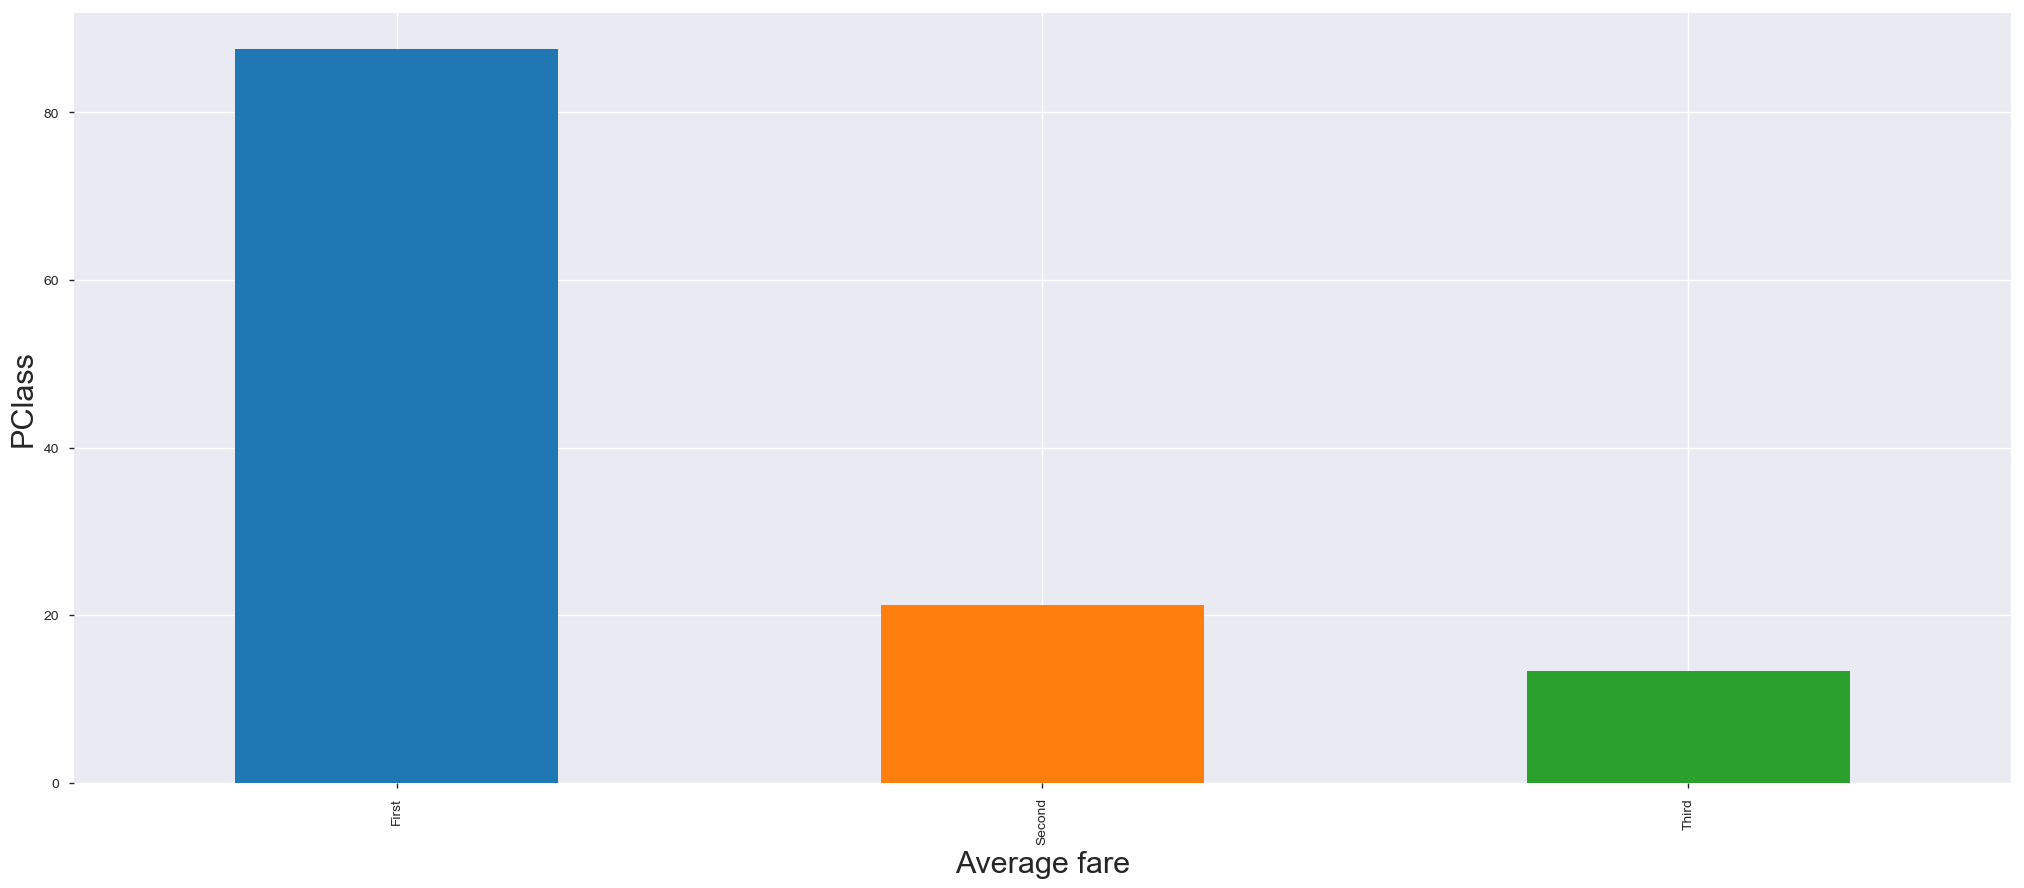

In [32]:
#the ticket fare correlates with the class 
ax = plt.subplot()
titanicData.groupby('pclass').mean()['fare'].plot(kind='bar', figsize=(25, 10), ax = ax)
plt.xlabel('Average fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('PClass',{'fontname':'Arial', 'size':'22'})
plt.show()

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'embarked')

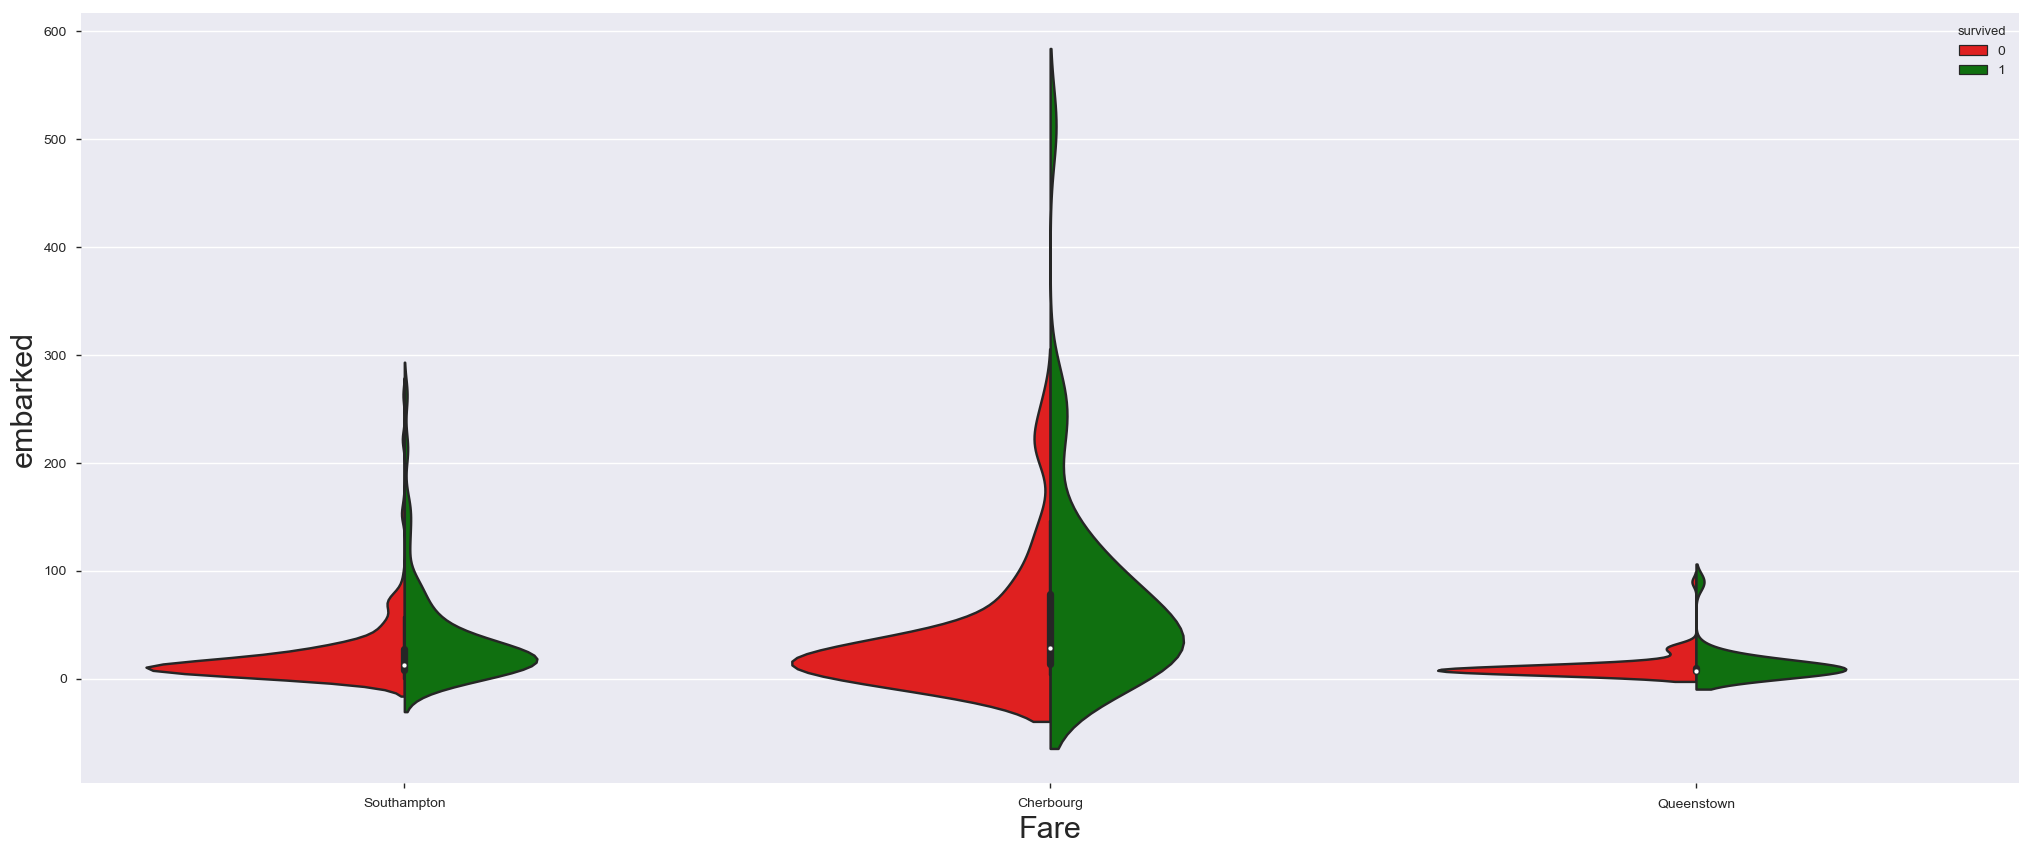

In [33]:
#now see how the embarkation site affects the survival.
fig = plt.figure(figsize=(25, 10))
sns.violinplot(x='embarked', y='fare', hue='survived', data=titanicData, split=True, palette={0: "r", 1: "g"})
plt.xlabel('Fare',{'fontname':'Arial', 'size':'22'})
plt.ylabel('embarked',{'fontname':'Arial', 'size':'22'})
plt.show()

In [34]:
# using pivot table with survived, fare, pclass, sex and boat
pd.crosstab(titanicData['boat'],[titanicData['sex'],titanicData['pclass']],
            margins=True, margins_name="Total").T.style.background_gradient(cmap='summer_r')

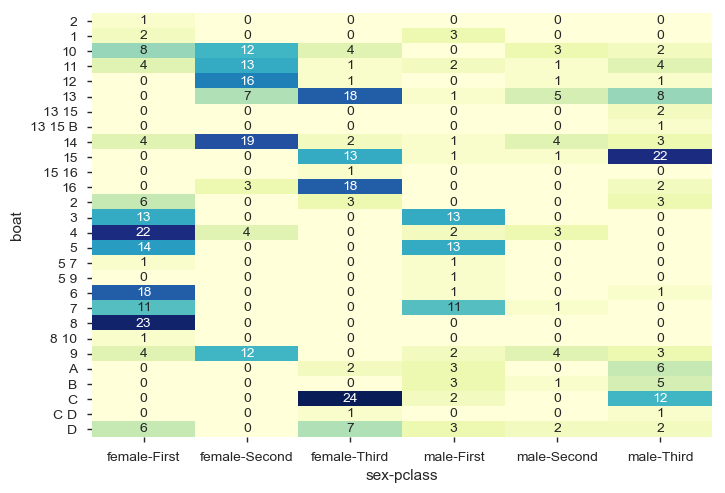

In [35]:
sns.heatmap(pd.crosstab(titanicData['boat'],[titanicData['sex'],titanicData['pclass']]),
            cmap="YlGnBu", annot=True, cbar=False)

This shows that the Female passengers with pclass 1 has used maximum number of boats 138 comparing to other passengers.

#SibSp and Parch would make more sense as a combined feature, that shows the total number of relatives, a person has on the Titanic. I will create it below and also a feature that sows if someone is not alone.

In [36]:
for dataset in titanicData:
    titanicData['relatives'] = titanicData['sibsp'] + titanicData['parch']
    titanicData.loc[titanicData['relatives'] > 0, 'not_alone'] = 0
    titanicData.loc[titanicData['relatives'] == 0, 'not_alone'] = 1
    titanicData['not_alone'] = titanicData['not_alone'].astype(int)

titanicData['not_alone'].value_counts()

1    790
0    519
Name: not_alone, dtype: int64

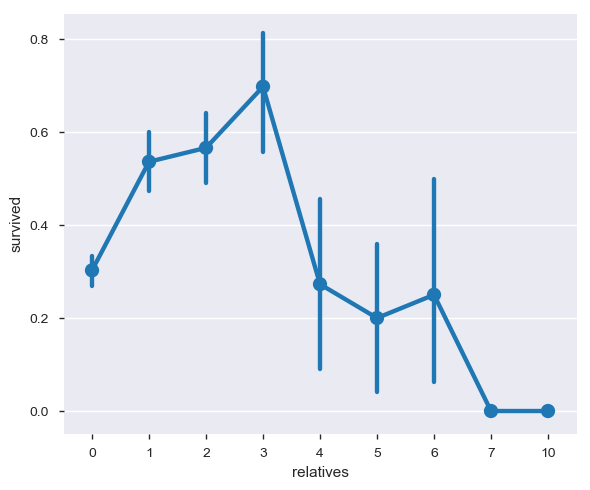

In [37]:
axes = sns.factorplot('relatives','survived', 
                      data=titanicData, aspect = 1.2, )

# Feature Engginering

In [38]:
featureEngData = titanicData.copy(deep=True)
featureEngData.info()
featureEngData.shape
type(featureEngData)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
pclass       1309 non-null object
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
relatives    1309 non-null int64
not_alone    1309 non-null int32
dtypes: float64(3), int32(1), int64(4), object(8)
memory usage: 158.6+ KB


(1309, 16)

pandas.core.frame.DataFrame

In [39]:
## Extracting the passenger titles
titles = set()
for name in featureEngData['name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)

{'Mr', 'Mrs', 'Sir', 'Master', 'Ms', 'Dona', 'Don', 'Jonkheer', 'Col', 'Mme', 'Major', 'Dr', 'Capt', 'Mlle', 'the Countess', 'Miss', 'Rev', 'Lady'}


In [40]:
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

def get_titles():
    # we extract the title from each name
    featureEngData['title'] = featureEngData['name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated title we map each title
    featureEngData['title'] = featureEngData.title.map(Title_Dictionary)    
    return featureEngData

In [41]:
featureEngData = get_titles()
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,relatives,not_alone,title
0,First,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,Southampton,2,NaN,"St Louis, MO",0,1,Miss
1,First,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON",3,0,Master
2,First,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0,Miss
3,First,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON",3,0,Mr
4,First,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",3,0,Mrs


In [42]:
pd.crosstab(featureEngData['title'],featureEngData['sex']).T.style.background_gradient(cmap='summer_r')

title,Master,Miss,Mr,Mrs,Officer,Royalty
sex,,,,,,
female,0,262,0,200,1,2
male,61,0,757,0,22,3


In [43]:
# check if the titles have been filled correctly.
featureEngData[featureEngData['title'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,relatives,not_alone,title
218,First,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,Cherbourg,8,NaN,NaN,0,1,NaN


There is indeed a NaN value in the line 218. In fact the corresponding name is Oliva y Ocana, Dona. Fermina.
This title was not encoutered in the train dataset.

In [44]:
# encoding in dummy variable
titles_dummies = pd.get_dummies(featureEngData['title'], prefix='Title')
featureEngData = pd.concat([featureEngData, titles_dummies], axis=1)
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,home.dest,relatives,not_alone,title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,First,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,"St Louis, MO",0,1,Miss,0,1,0,0,0,0
1,First,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",3,0,Master,1,0,0,0,0,0
2,First,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",3,0,Miss,0,1,0,0,0,0
3,First,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",3,0,Mr,0,0,1,0,0,0
4,First,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,"Montreal, PQ / Chesterville, ON",3,0,Mrs,0,0,0,1,0,0


## processing for age

In [45]:
print (featureEngData.iloc[:1309].age.isnull().sum())

263


Processing the ages as we have seen age has 263 / 20.1% missing values Missing. As this is large number of missing data and replacing them with mean, median will not give proper outcome, since the age may differ by groups and categories of passengers. Let's group the age with Sex, PClass and Newly added column Title

In [46]:
bins = [0, 12, 17, 22,27,33,40,66, 80]
labels = [1,2,3,4,5,6,7,8]
age_groups = pd.cut(featureEngData.age, bins, labels=labels)
featureEngData['age_group'] = age_groups
featureEngData.pivot_table(index='embarked', columns='age_group', aggfunc=np.median).fare

age_group,1,2,3,4,5,6,7,8
embarked,,,,,,,,
Cherbourg,17.2646,14.45420,15.7417,39.2917,27.7208,64.51665,76.29170,42.0792
Queenstown,29.1250,7.74165,7.7500,7.7500,7.7500,12.35000,11.01875,7.7500
Southampton,26.0000,18.00000,8.9625,10.5000,13.0000,16.70000,26.00000,50.5000


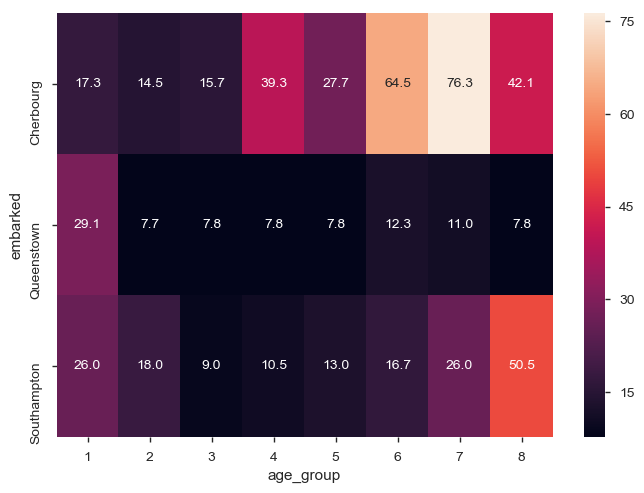

In [47]:
df = featureEngData.pivot_table(index='embarked', columns='age_group', values='fare', aggfunc=np.median)
sns.heatmap(df, annot=True, fmt=".1f")
plt.show()

In [48]:
#Now lets see by grouping function for pclass, title sex:
print(featureEngData.groupby(['sex','pclass','title'])['age'].count())

sex     pclass  title  
female  First   Miss        61
                Mrs         68
                Officer      1
                Royalty      2
        Second  Miss        48
                Mrs         55
        Third   Miss       103
                Mrs         49
male    First   Master       5
                Mr         132
                Officer     11
                Royalty      3
        Second  Master      11
                Mr         137
                Officer     10
        Third   Master      37
                Mr         312
Name: age, dtype: int64


In [49]:
#Now lets see by grouping function for both class, title sex:

grouped_train = featureEngData.iloc[:1309].groupby(['pclass','title','sex'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['sex', 'pclass', 'title', 'age']]

def fill_age(row):
    condition = (
        (grouped_median_train['sex'] == row['sex']) & 
        (grouped_median_train['title'] == row['title']) & 
        (grouped_median_train['pclass'] == row['pclass'])
    ) 
    return grouped_median_train[condition]['age'].values[0]

def process_age():
    # a function that fills the missing values of the Age variable
    featureEngData['age'] = featureEngData.apply(lambda row: fill_age(row) if np.isnan(row['age']) else row['age'], axis=1)
    return featureEngData

In [50]:
featureEngData = process_age()
featureEngData.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,relatives,not_alone,title,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,age_group
0,First,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,0,1,Miss,0,1,0,0,0,0,5
1,First,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,3,0,Master,1,0,0,0,0,0,1
2,First,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,3,0,Miss,0,1,0,0,0,0,1
3,First,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,3,0,Mr,0,0,1,0,0,0,5
4,First,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,3,0,Mrs,0,0,0,1,0,0,4


In [51]:
print (featureEngData.iloc[:1309].age.isnull().sum())

0


Perfect. The missing ages have been replaced.

In [52]:
pd.crosstab(featureEngData['sibsp'],featureEngData['pclass']).style.background_gradient('summer_r')

pclass,First,Second,Third
sibsp,,,
0,198,182,511
1,113,82,124
2,8,12,22
3,4,1,15
4,0,0,22
5,0,0,6
8,0,0,9


In [53]:
pd.crosstab(featureEngData['sex'],featureEngData['boat']).style.background_gradient('summer_r')

boat,2,1,10,11,12,13,13 15,13 15 B,14,15,15 16,16,2,3,4,5,5 7,5 9,6,7,8,8 10,9,A,B,C,C D,D
sex,,,,,,,,,,,,,,,,,,,,,,,,,,,,
female,1,2,24,18,17,25,0,0,25,13,1,21,9,13,26,14,1,0,18,11,23,1,16,2,0,24,1,13
male,0,3,5,7,2,14,2,1,8,24,0,2,3,13,5,13,1,1,2,12,0,0,9,9,9,14,1,7


In [54]:
pd.crosstab(featureEngData['title'],featureEngData['boat'], margins=True, 
            margins_name="Total").style.background_gradient('summer_r')

boat,2,1,10,11,12,13,13 15,13 15 B,14,15,15 16,16,2,3,4,5,5 7,5 9,6,7,8,8 10,9,A,B,C,C D,D,Total
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Master,0,0,3,3,0,2,0,0,3,2,0,1,2,1,5,1,0,0,0,0,0,0,0,0,0,5,1,2,31
Miss,1,1,11,10,11,19,0,0,11,8,1,18,4,6,13,3,0,0,6,3,11,1,9,0,0,16,0,6,169
Mr,0,2,2,4,2,11,2,1,5,22,0,1,1,10,0,11,1,1,1,12,0,0,9,9,8,9,0,5,129
Mrs,0,0,13,8,6,6,0,0,14,5,0,3,5,7,13,11,1,0,12,8,9,0,7,2,0,8,1,7,146
Officer,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,1,0,1,0,0,0,1,0,0,0,7
Royalty,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,3
Total,1,5,29,25,19,39,2,1,33,37,1,23,12,26,31,27,2,1,20,23,22,1,25,11,9,38,2,20,485


Above details shows that majortity of boats were provided for female passangers compare to males

In [55]:
pd.crosstab(featureEngData['home.dest'],featureEngData['sex']).T.style.background_gradient('summer_r')

home.dest,"?Havana, Cuba","Aberdeen / Portland, OR","Albany, NY","Altdorf, Switzerland","Amenia, ND","Antwerp, Belgium / Stanton, OH",Argentina,"Asarum, Sweden Brooklyn, NY","Ascot, Berkshire / Rochester, NY","Auburn, NY","Aughnacliff, Co Longford, Ireland New York, NY","Australia Fingal, ND",Austria,"Austria Niagara Falls, NY",Austria-Hungary,"Austria-Hungary / Germantown, Philadelphia, PA","Bangkok, Thailand / Roseville, IL","Barcelona, Spain / Havana, Cuba","Barre, Co Washington, VT","Basel, Switzerland","Bath, England / Massachusetts","Bayside, Queens, NY",Belfast,"Belfast, NI","Belgium Montreal, PQ","Belgium Detroit, MI","Belmont, MA","Bennington, VT","Bergen, Norway","Berne, Switzerland / Central City, IA","Birkdale, England Cleveland, Ohio","Bishopstoke, Hants / Fayette Valley, ID","Boston, MA","Bournemouth, England","Bournemouth, England Newark, NJ","Bournmouth, England","Brennes, Norway New York","Bridgerule, Devon","Bridgwater, Somerset, England","Brighton, MA","Brighton, Sussex","Bristol, Avon / Jacksonville, FL","Bristol, England / New Britain, CT","Bristol, England Cleveland, OH","Brockton, MA","Bromsgrove, England / Montreal, PQ","Bronx, NY","Brookline, MA","Brooklyn, NY","Broomfield, Chelmsford, England","Brunswick, ME","Bryn Mawr, PA","Bryn Mawr, PA, USA","Buenos Aires, Argentina / New Jersey, NJ","Buffalo, NY","Bulgaria Chicago, IL","Bulgaria Coon Rapids, IA","Calgary, AB","Cambridge, MA","Cape Town, South Africa / Seattle, WA","Catford, Kent / Detroit, MI","Chelsea, London","Chicago, IL","Cincinatti, OH","Clevedon, England","Co Athlone, Ireland New York, NY","Co Clare, Ireland Washington, DC","Co Cork, Ireland Charlestown, MA","Co Cork, Ireland Roxbury, MA","Co Limerick, Ireland Sherbrooke, PQ","Co Longford, Ireland New York, NY","Co Sligo, Ireland Hartford, CT","Co Sligo, Ireland New York, NY","Cologne, Germany","Columbus, OH","Cooperstown, NY","Copenhagen, Denmark",Cornwall,"Cornwall / Akron, OH","Cornwall / Camden, NJ","Cornwall / Clear Creek, CO","Cornwall / Hancock, MI","Cornwall / Houghton, MI","Cornwall / Spokane, WA","Cornwall, England Houghton, MI",Croatia,"Dagsas, Sweden Fower, MN","Deephaven, MN / Cedar Rapids, IA","Deer Lodge, MT","Denmark / New York, NY","Denmark Hill, Surrey / Chicago","Denver, CO","Detroit, MI","Devon, England Wichita, KS","Devonport, England","Dorchester, MA","Dorking, Surrey, England","Dowagiac, MI","Duluth, MN","East Bridgewater, MA","East Orange, NJ","East Providence, RI","Effington Rut, SD","Elizabeth, NJ","Elkins Park, PA","Elmira, NY / Orange, NJ",England,"England / Bennington, VT","England / Detroit, MI","England / Hartford, CT","England / Philadelphia, PA","England / Sacramento, CA","England / San Francisco, CA","England Albion, NY","England Brooklyn, NY","England New York, NY","England Oglesby, IL","England Salt Lake City, Utah","Finland / Minneapolis, MN","Finland / Washington, DC","Finland Sudbury, ON","Folkstone, Kent / New York, NY","Fond du Lac, WI","Foresvik, Norway Portland, ND","Frankfort, KY","Gallipolis, Ohio / ? Paris / New York","Geneva, Switzerland / Radnor, PA","Germantown, Philadelphia, PA",Glasgow,"Glasgow / Bangor, ME","Glen Ridge, NJ","Goteborg, Sweden / Rockford, IL","Goteborg, Sweden Huntley, IL",Greece,"Green Bay, WI","Greenport, NY","Greensburg, PA","Greenwich, CT",Guernsey,"Guernsey / Elizabeth, NJ","Guernsey / Montclair, NJ and/or Toledo, Ohio","Guernsey / Wilmington, DE","Guernsey, England / Edgewood, RI","Gunnislake, England / Butte, MT","Guntur, India / Benton Harbour, MI","Haddenfield, NJ","Halesworth, England","Halifax, NS","Hamilton, ON","Harrisburg, PA","Harrow, England","Harrow-on-the-Hill, Middlesex","Hartford, CT","Hartford, Huntingdonshire","Haverford, PA","Haverford, PA / Cooperstown, NY","Helsinki, Finland Ashtabula, Ohio","Hessle, Yorks","Holley, NY","Hong Kong New York, NY","Hornsey, England","Hudson, NY","Huntington, WV","Ilford, Essex / Winnipeg, MB","Ilfracombe, Devon","Illinois, USA","India / Pittsburgh, PA","India / Rapid Ci

## processing for fare

In [56]:
print (featureEngData.iloc[:1309].fare.isnull().sum())

1


In [57]:
# there's one missing fare value - replacing it with the mean.
featureEngData.fare.fillna(featureEngData.iloc[:1309].fare.mean(), inplace=True)
print (featureEngData.iloc[:1309].fare.isnull().sum())

0


## processing for Embarked

In [58]:
print (featureEngData.iloc[:1309].embarked.isnull().sum())

2


In [59]:
# two missing embarked values - filling them with the most frequent one in the featureEngData set(S)
featureEngData.iloc[:1309].embarked.fillna(featureEngData.iloc[:1309].embarked.mode())
featureEngData.info()

0       Southampton
1       Southampton
2       Southampton
3       Southampton
4       Southampton
5       Southampton
6       Southampton
7       Southampton
8       Southampton
9         Cherbourg
10        Cherbourg
11        Cherbourg
12        Cherbourg
13      Southampton
14      Southampton
15      Southampton
16        Cherbourg
17        Cherbourg
18        Cherbourg
19        Cherbourg
20      Southampton
21      Southampton
22        Cherbourg
23        Cherbourg
24      Southampton
25        Cherbourg
26        Cherbourg
27        Cherbourg
28      Southampton
29      Southampton
           ...     
1279    Southampton
1280    Southampton
1281    Southampton
1282    Southampton
1283    Southampton
1284    Southampton
1285    Southampton
1286      Cherbourg
1287    Southampton
1288    Southampton
1289    Southampton
1290    Southampton
1291    Southampton
1292    Southampton
1293    Southampton
1294    Southampton
1295    Southampton
1296    Southampton
1297    Southampton


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 24 columns):
pclass           1309 non-null object
survived         1309 non-null int64
name             1309 non-null object
sex              1309 non-null object
age              1309 non-null float64
sibsp            1309 non-null int64
parch            1309 non-null int64
ticket           1309 non-null object
fare             1309 non-null float64
cabin            295 non-null object
embarked         1307 non-null object
boat             486 non-null object
body             121 non-null float64
home.dest        745 non-null object
relatives        1309 non-null int64
not_alone        1309 non-null int32
title            1308 non-null object
Title_Master     1309 non-null uint8
Title_Miss       1309 non-null uint8
Title_Mr         1309 non-null uint8
Title_Mrs        1309 non-null uint8
Title_Officer    1309 non-null uint8
Title_Royalty    1309 non-null uint8
age_group        1046 non-null 

In [60]:
# dummy encoding for embarked values 
embarked_dummies = pd.get_dummies(featureEngData.iloc[:1309].embarked, prefix='Embarked')
featureEngData = pd.concat([featureEngData, embarked_dummies], axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,age_group,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,First,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,...,0,1,0,0,0,0,5,0,0,1
1,First,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,...,1,0,0,0,0,0,1,0,0,1
2,First,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,...,0,1,0,0,0,0,1,0,0,1
3,First,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,...,0,0,1,0,0,0,5,0,0,1
4,First,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,...,0,0,0,1,0,0,4,0,0,1


(1309, 27)

## processing for cabin

In [61]:
print (featureEngData.iloc[:1309].cabin.isnull().sum())

1014


In [62]:
# replacing missing cabins with U (for Uknown)
featureEngData.cabin.fillna('U', inplace=True)
print (featureEngData.iloc[:1309].cabin.isnull().sum())

0


In [63]:
#Takenfirst letter of name Cabin ex. C22 
train_cabin = set()

for c in featureEngData.iloc[:1309]['cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')

print (train_cabin)

{'E', 'C', 'D', 'F', 'G', 'T', 'A', 'U', 'B'}


In [64]:
# mapping each Cabin value with the cabin letter
featureEngData['cabin'] = featureEngData['cabin'].map(lambda C: C[0])

# dummy encoding ...
cabin_dummies = pd.get_dummies(featureEngData['cabin'], prefix='Cabin')    

featureEngData = pd.concat([featureEngData, cabin_dummies], axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Embarked_Southampton,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,First,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B,...,1,0,1,0,0,0,0,0,0,0
1,First,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
2,First,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
3,First,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
4,First,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0


(1309, 36)

In [65]:
pd.crosstab(featureEngData['sex'],featureEngData['cabin'],margins=True, 
            margins_name="Total").style.background_gradient('summer_r')

cabin,A,B,C,D,E,F,G,T,U,Total
sex,,,,,,,,,,
female,4,36,46,23,19,8,5,0,325,466
male,18,29,48,23,22,13,0,1,689,843
Total,22,65,94,46,41,21,5,1,1014,1309


## Processing for sex mapping string values to numerical one 

In [66]:
featureEngData['sex'] = featureEngData['sex'].map({'male':1, 'female':0})
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Embarked_Southampton,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,First,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B,...,1,0,1,0,0,0,0,0,0,0
1,First,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
2,First,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
3,First,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0
4,First,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C,...,1,0,0,1,0,0,0,0,0,0


(1309, 36)

## processing for pclass

In [67]:
print (featureEngData.iloc[:1309].pclass.isnull().sum())

0


In [68]:
# encoding into 3 categories:
pclass_dummies = pd.get_dummies(featureEngData['pclass'], prefix="Pclass")
# adding dummy variable
featureEngData = pd.concat([featureEngData, pclass_dummies],axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_First,Pclass_Second,Pclass_Third
0,First,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,24160,211.3375,B,...,0,0,0,0,0,0,0,1,0,0
1,First,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0
2,First,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0
3,First,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0
4,First,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,113781,151.5500,C,...,1,0,0,0,0,0,0,1,0,0


(1309, 39)

In [69]:
print('Counts of Labels')
featureEngData.groupby("pclass").size()

Counts of Labels


pclass
First     323
Second    277
Third     709
dtype: int64

## processing for ticket

In [70]:
print (featureEngData.iloc[:1309].ticket.isnull().sum())

0


In [71]:
NoneType = type(None)
IntType = type(int)
def cleanTicket(ticket):
    if type(ticket) == NoneType:
        return 'XXX'
    elif type(ticket) == int:
        return 'XXX'
    else:
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'

In [72]:
# a function that extracts each prefix of the ticket, returns 'XXX' if no prefix (i.e the ticket is a digit)
tickets = set()
for t in featureEngData['ticket']:
    tickets.add(cleanTicket(t))

In [73]:
# Extracting dummy variables from tickets:

featureEngData['ticket'] = featureEngData['ticket'].map(cleanTicket)
tickets_dummies = pd.get_dummies(featureEngData['ticket'], prefix='Ticket')
featureEngData = pd.concat([featureEngData, tickets_dummies], axis=1)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,First,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,XXX,211.3375,B,...,0,0,0,0,0,0,0,0,0,1
1,First,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1
2,First,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1
3,First,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1
4,First,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,0,0,0,0,1


(1309, 76)

In [74]:
print('Counts of Labels')
featureEngData.groupby("ticket").size()

Counts of Labels


ticket
A            1
A4          10
A5          28
AQ3          1
AQ4          1
AS           1
C            8
CA          68
CASOTON      1
FC           3
FCC          9
Fa           1
LINE         4
LP           1
PC          92
PP           4
PPP          2
SC           2
SCA3         1
SCA4         2
SCAH         5
SCOW         1
SCPARIS     14
SCParis      5
SOC          8
SOP          1
SOPP         7
SOTONO2      3
SOTONOQ     24
SP           1
STONO       14
STONO2       7
STONOQ       1
SWPP         2
WC          15
WEP          4
XXX        957
dtype: int64

## Introducing a new feature : the size of families 

Below we are introduces 4 new features:

FamilySize : the total number of relatives including the passenger (him/her)self.
Sigleton : a boolean variable that describes families of size = 1
SmallFamily : a boolean variable that describes families of 2 <= size <= 4
LargeFamily : a boolean variable that describes families of 5 < size

In [75]:
# introducing a new feature : the size of families (including the passenger)
featureEngData['FamilySize'] = featureEngData['parch'] + featureEngData['sibsp'] + 1

# introducing other features based on the family size
featureEngData['Singleton'] = featureEngData['FamilySize'].map(lambda s: 1 if s == 1 else 0)
featureEngData['SmallFamily'] = featureEngData['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
featureEngData['LargeFamily'] = featureEngData['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
featureEngData.head()
featureEngData.shape

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,First,1,"Allen, Miss. Elisabeth Walton",0,29.0000,0,0,XXX,211.3375,B,...,0,0,0,0,0,1,1,1,0,0
1,First,1,"Allison, Master. Hudson Trevor",1,0.9167,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0
2,First,0,"Allison, Miss. Helen Loraine",0,2.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0
3,First,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0
4,First,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.0000,1,2,XXX,151.5500,C,...,0,0,0,0,0,1,4,0,1,0


(1309, 80)

In [76]:
#Making copy of Feature Engginering dataset
featureEngData1 = featureEngData.copy()
featureEngData1.info()
featureEngData1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 80 columns):
pclass                  1309 non-null object
survived                1309 non-null int64
name                    1309 non-null object
sex                     1309 non-null int64
age                     1309 non-null float64
sibsp                   1309 non-null int64
parch                   1309 non-null int64
ticket                  1309 non-null object
fare                    1309 non-null float64
cabin                   1309 non-null object
embarked                1307 non-null object
boat                    486 non-null object
body                    121 non-null float64
home.dest               745 non-null object
relatives               1309 non-null int64
not_alone               1309 non-null int32
title                   1308 non-null object
Title_Master            1309 non-null uint8
Title_Miss              1309 non-null uint8
Title_Mr                1309 non-null uint8
Ti

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest', 'relatives',
       'not_alone', 'title', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'age_group',
       'Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Pclass_First', 'Pclass_Second',
       'Pclass_Third', 'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3',
       'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON',
       'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_LP',
       'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA3',
       'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS',
       'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP', 'Ticket_SOPP',
       'Ticket_SOTONO2', 'Ticket_SOTONOQ', 

## removing all duplicate and unused variables

In [77]:
featureEngData1.drop('name', axis=1, inplace=True)
featureEngData1.drop('embarked', axis=1, inplace=True)
featureEngData1.drop('cabin', axis=1, inplace=True)
featureEngData1.drop('pclass',axis=1,inplace=True)
featureEngData1.drop('ticket', inplace=True, axis=1)
featureEngData1.drop('title', axis=1, inplace=True)
featureEngData1.drop('boat', axis=1, inplace=True)
featureEngData1.drop('body', axis=1, inplace=True)
featureEngData1.drop('home.dest', axis=1, inplace=True)
featureEngData1.drop('survived', axis=1, inplace=True)
featureEngData1.drop('sibsp', axis=1, inplace=True)
featureEngData1.drop('parch', axis=1, inplace=True)
featureEngData1.drop('age_group', axis=1, inplace=True)

In [78]:
featureEngData1.head()
featureEngData1.columns
featureEngData1.shape

,sex,age,fare,relatives,not_alone,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,0,29.0000,211.3375,0,1,0,1,0,0,0,...,0,0,0,0,0,1,1,1,0,0
1,1,0.9167,151.5500,3,0,1,0,0,0,0,...,0,0,0,0,0,1,4,0,1,0
2,0,2.0000,151.5500,3,0,0,1,0,0,0,...,0,0,0,0,0,1,4,0,1,0
3,1,30.0000,151.5500,3,0,0,0,1,0,0,...,0,0,0,0,0,1,4,0,1,0
4,0,25.0000,151.5500,3,0,0,0,0,1,0,...,0,0,0,0,0,1,4,0,1,0


Index(['sex', 'age', 'fare', 'relatives', 'not_alone', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton',
       'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F',
       'Cabin_G', 'Cabin_T', 'Cabin_U', 'Pclass_First', 'Pclass_Second',
       'Pclass_Third', 'Ticket_A', 'Ticket_A4', 'Ticket_A5', 'Ticket_AQ3',
       'Ticket_AQ4', 'Ticket_AS', 'Ticket_C', 'Ticket_CA', 'Ticket_CASOTON',
       'Ticket_FC', 'Ticket_FCC', 'Ticket_Fa', 'Ticket_LINE', 'Ticket_LP',
       'Ticket_PC', 'Ticket_PP', 'Ticket_PPP', 'Ticket_SC', 'Ticket_SCA3',
       'Ticket_SCA4', 'Ticket_SCAH', 'Ticket_SCOW', 'Ticket_SCPARIS',
       'Ticket_SCParis', 'Ticket_SOC', 'Ticket_SOP', 'Ticket_SOPP',
       'Ticket_SOTONO2', 'Ticket_SOTONOQ', 'Ticket_SP', 'Ticket_STONO',
       'Ticket_STONO2', 'Ticket_STONOQ', 'Ticket_SWPP', 'Ticket_WC',
       'Ticket_WEP', 'Ticket_XXX', 'FamilySize

(1309, 67)

In [79]:
X = featureEngData1
y = featureEngData['survived'].values
#featureEngData1.to_excel('output1.xlsx', engine='xlsxwriter') 

# Now start building the models using this converted data

## Creating training dataset

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, random_state=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

(1047, 67)

(262, 67)

(1047,)

(262,)

pandas.core.frame.DataFrame

## Creating Decision Tree

In [81]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(criterion="gini",max_depth=5)
clf_dt.fit (X_train, y_train)
classes = clf_dt.predict(X_test)
clf_dt.score (X_test, y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

0.8015267175572519

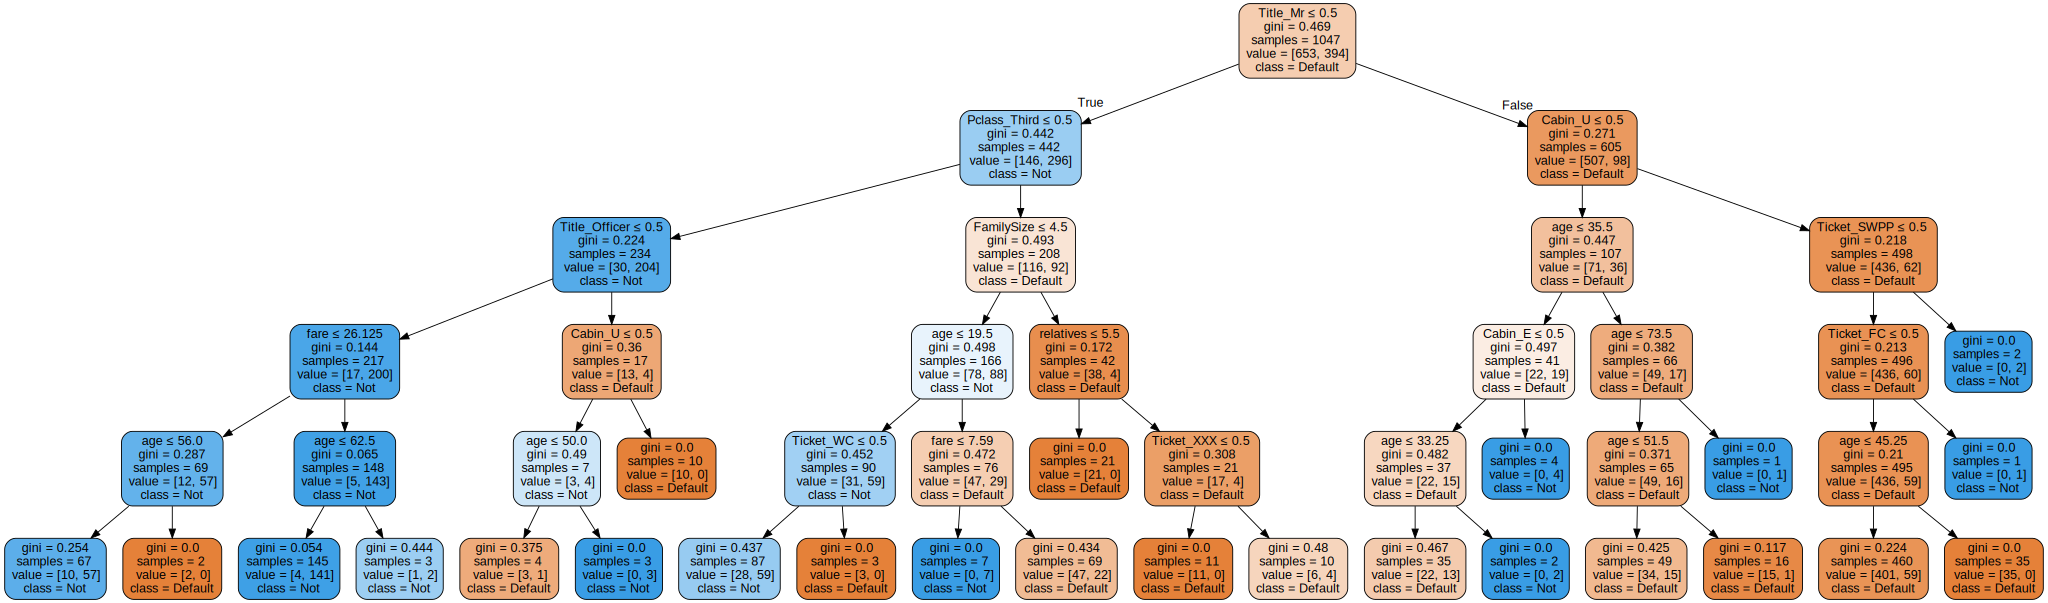

In [82]:
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(clf_dt, out_file=None,
                               feature_names=X_train.columns,
                               class_names=['Default','Not'],
                               filled=True, rounded=True,
                               special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Decision Tree - Precision and Recall

In [83]:
#Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(y_test,classes))
print('Precision/Recall Metrices')
print(metrics.classification_report(y_test,classes))
print('AUC')
print(metrics.roc_auc_score(y_test,classes))

Accuracy Score
0.8015267175572519
Precision/Recall Metrices
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       156
           1       0.86      0.61      0.71       106

   micro avg       0.80      0.80      0.80       262
   macro avg       0.82      0.77      0.78       262
weighted avg       0.81      0.80      0.79       262

AUC
0.7713473633284954


## Decision Tree -  ROC Chart

Text(0.5, 1.0, 'ROCR CHART')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

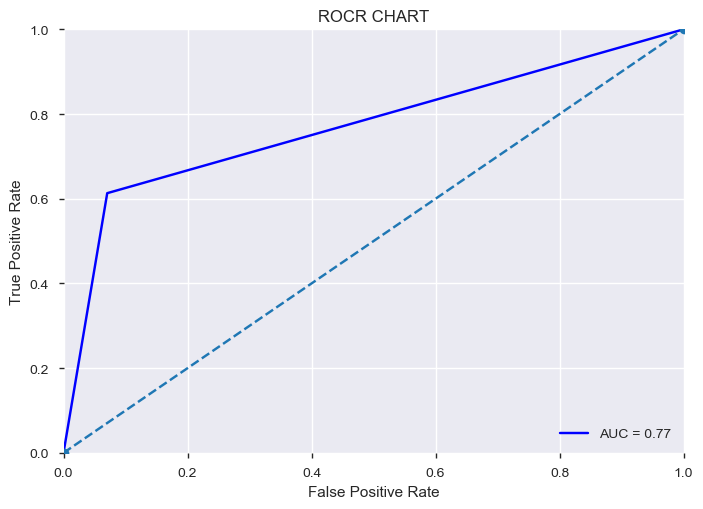

In [84]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,classes)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Decision Tree -  Confusion Matrix

Confusion Matrix


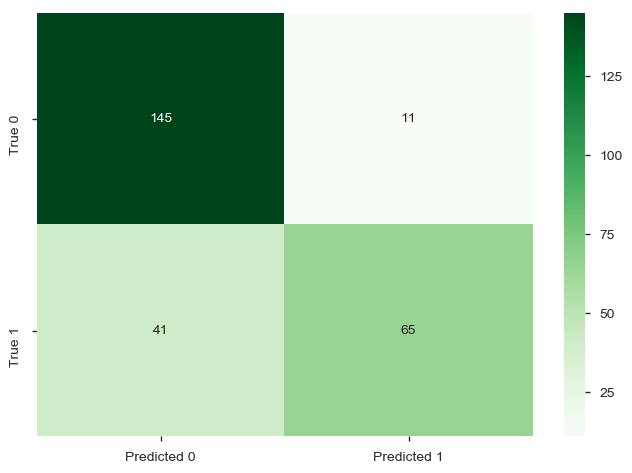

In [85]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,classes)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

In [86]:
feature_imp=pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(clf_dt.feature_importances_)],axis=1)

In [87]:
feature_imp.columns=['Feature','Relative_Importance']

In [88]:
feature_imp=feature_imp.sort_values('Relative_Importance',ascending=False)

In [ ]:
feature_imp.head(10)

,Feature,Relative_Importance
7,Title_Mr,0.528377
25,Pclass_Third,0.163026
1,age,0.075181
9,Title_Officer,0.059608
63,FamilySize,0.050879
22,Cabin_U,0.042547
2,fare,0.031083
59,Ticket_SWPP,0.012354
60,Ticket_WC,0.010704
18,Cabin_E,0.010243


In [ ]:
decision_tree_accuracy_score = metrics.accuracy_score(y_test,classes)
print(decision_tree_accuracy_score)

0.8015267175572519


In [ ]:
#Applying the learnt model on the test dataset
y_pred_test = pd.DataFrame( { 'actual':  y_test,
                            'predicted': clf_dt.predict( X_test ) } )
y_pred_test.shape
y_pred_test.head(10)
y_pred_test

(262, 2)

,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


In [ ]:
#Generate Model Diagnostics
predictions = clf_dt.predict(X_test)
print("Total Cases : - ", predictions.size)

print("Positive cases in Test Data using Decision Tree : - ",predictions[y_test==1].shape[0])
print("Negative cases in Test Data using Decision Tree : - ",predictions[y_test==0].shape[0])

Total Cases : -  262
Positive cases in Test Data using Decision Tree : -  106
Negative cases in Test Data using Decision Tree : -  156


In [ ]:
param_grid = {'max_depth': np.arange(3, 11),
             'max_features': np.arange(3,11)}

In [ ]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
tree.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
tree.best_params_

{'max_depth': 7, 'max_features': 9}

In [ ]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [ ]:
clf_tree = DecisionTreeClassifier( max_depth = 8, max_features=9 )
clf_tree.fit( X_train, y_train )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=9, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [ ]:
clf_tree.feature_importances_

array([1.29108377e-03, 8.55768333e-02, 5.75486231e-02, 1.35168653e-02,
       2.68313691e-03, 0.00000000e+00, 1.79725981e-04, 4.69118733e-01,
       1.64341249e-03, 3.20129691e-02, 3.97569171e-03, 3.13603961e-04,
       6.96033240e-03, 3.34380919e-04, 0.00000000e+00, 2.44023547e-05,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.28947770e-03, 1.44958378e-01,
       7.48911869e-02, 2.60470691e-04, 0.00000000e+00, 0.00000000e+00,
       1.31150299e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.63776551e-04, 0.00000000e+00, 0.00000000e+00, 4.41839315e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       4.62945751e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
clf_tree.predict(X_train)

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

## Logistic Regression

In [ ]:
from sklearn.linear_model import  LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
print('Coefficients: \n',log_model.coef_)

Coefficients: 
 [[-1.10588722 -0.02936283  0.00262042 -0.37577593  0.36660391  1.19932245
   0.35581446 -1.06295226  0.9407207  -0.79867512 -0.18194271  0.45721065
   0.02339154 -0.0512176   0.43772183  0.25770652 -0.19780405  0.27453798
   0.80345573  0.45612592 -0.63535847 -0.25275106 -0.52768066  0.89807486
   0.30199506 -0.58411619  0.34836056 -0.39060553 -0.31550584 -0.47504373
   0.         -0.07141766  0.07995504  0.11789936 -0.14193799  0.21337079
  -0.23982456  0.         -0.16133472 -0.07133998 -0.26497074  0.57981305
  -0.05824258 -0.14193799 -0.19916    -0.14196901 -0.4052726   0.
   0.51164002  0.03970429 -0.37703691  0.         -0.02677342  0.60332614
  -0.27266354 -0.08528682  1.25360733 -0.07279306  0.          1.31166498
  -0.48995363 -0.17155573  0.1312382   0.2401778   0.36660391  0.71435916
  -0.46500933]]


In [ ]:
#Find out key predictor of churn
coeff= pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(log_model.coef_))], axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values("Variable",ascending=True)

,Variable,Coeff
14,Cabin_A,0.437722
15,Cabin_B,0.257707
16,Cabin_C,-0.197804
17,Cabin_D,0.274538
18,Cabin_E,0.803456
19,Cabin_F,0.456126
20,Cabin_G,-0.635358
21,Cabin_T,-0.252751
22,Cabin_U,-0.527681
11,Embarked_Cherbourg,0.457211


In [ ]:
#Applying the learnt model on the test dataset
y_pred_test = pd.DataFrame( { 'actual':  y_test,
                            'predicted': log_model.predict( X_test ) } )
y_pred_test.shape
y_pred_test.head(10)

(262, 2)

,actual,predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


In [ ]:
#Generate Model Diagnostics
predictions = log_model.predict(X_test)
print("Total Cases : - ", predictions.size)

print("Positive cases in Test Data using Logistic Regresion : - ",predictions[y_test==1].shape[0])
print("Negative cases in Test Data using Logistic Regresion : - ",predictions[y_test==0].shape[0])

Total Cases : -  262
Positive cases in Test Data using Logistic Regresion : -  106
Negative cases in Test Data using Logistic Regresion : -  156


## Logistic Regression - Precision and Recall

In [ ]:
#Precision and Recall
print('Accuracy Score')
logistic_reg_accuracy_score = round(metrics.accuracy_score(y_test,predictions),2)
print(logistic_reg_accuracy_score)
print('Precision/Recall Metrices')
print(metrics.classification_report(y_test,predictions))
print('AUC')
print(metrics.roc_auc_score(y_test,predictions))

Accuracy Score
0.85
Precision/Recall Metrices
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       156
           1       0.87      0.74      0.80       106

   micro avg       0.85      0.85      0.85       262
   macro avg       0.85      0.83      0.84       262
weighted avg       0.85      0.85      0.84       262

AUC
0.8294629898403484


## Logistic Regression - ROC Chart

Text(0.5, 1.0, 'ROCR CHART')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

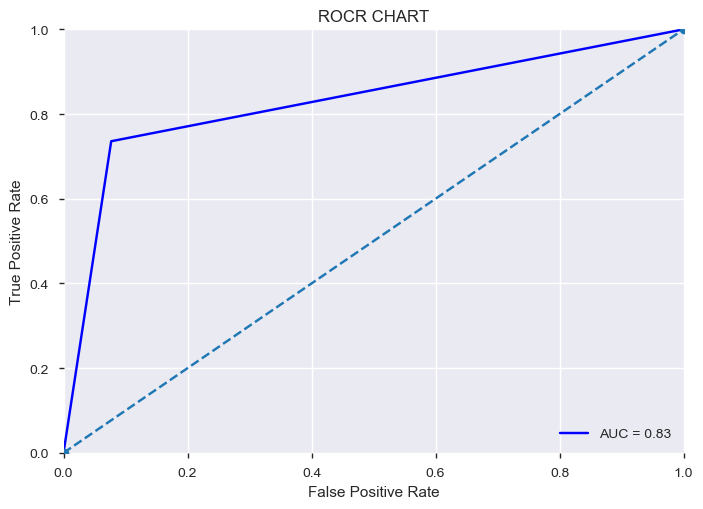

In [ ]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,predictions)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Logistic Regression - Confusion Matrix

Confusion Matrix


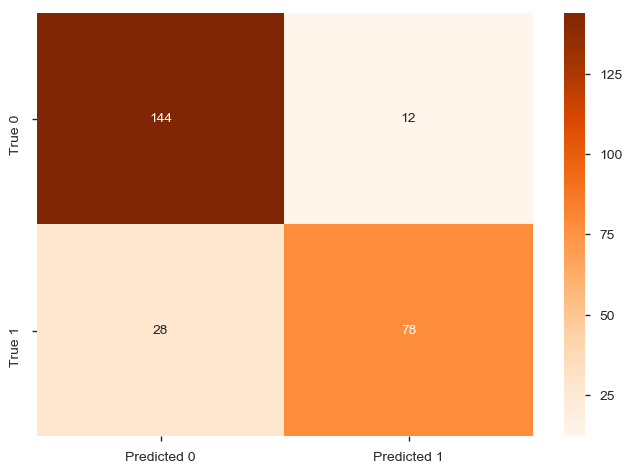

In [ ]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,predictions)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Oranges", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

## Build SVM Model

In [ ]:
svm_clf = svm.SVC()

In [ ]:
#Fitting the model
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [ ]:
#Applying the learnt model on the test dataset
y_pred_test = pd.DataFrame( { 'actual':  y_test,
                            'predicted': svm_clf.predict( X_test ) } )
y_pred_test.shape
y_pred_test.head(10)

(262, 2)

,actual,predicted
0,0,0
1,0,1
2,1,1
3,0,0
4,1,1
5,0,0
6,0,0
7,1,1
8,1,1
9,0,0


In [ ]:
#Generate Model Diagnostics
predictions = svm_clf.predict(X_test)
print("Total Cases : - ", predictions.size)

print("Positive cases in Test Data using SVM : - ",predictions[y_test==1].shape[0])
print("Negative cases in Test Data using SVM : - ",predictions[y_test==0].shape[0])

Total Cases : -  262
Positive cases in Test Data using SVM : -  106
Negative cases in Test Data using SVM : -  156


In [ ]:
#Generating accuracy score
metrics.accuracy_score(y_test, predictions)

0.6717557251908397

## SVM Model - ROC Chart

Text(0.5, 1.0, 'ROCR CHART')

(0, 1)

(0, 1)

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 0, 'False Positive Rate')

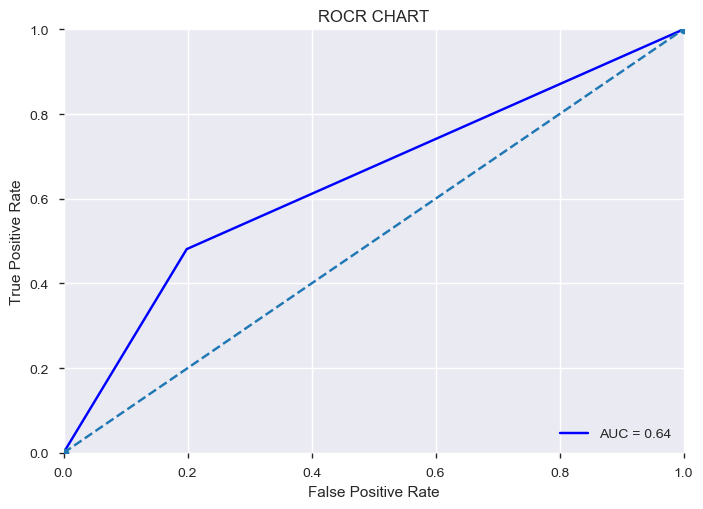

In [ ]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,predictions)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## SVM Model - Confusion Matrix

Confusion Matrix


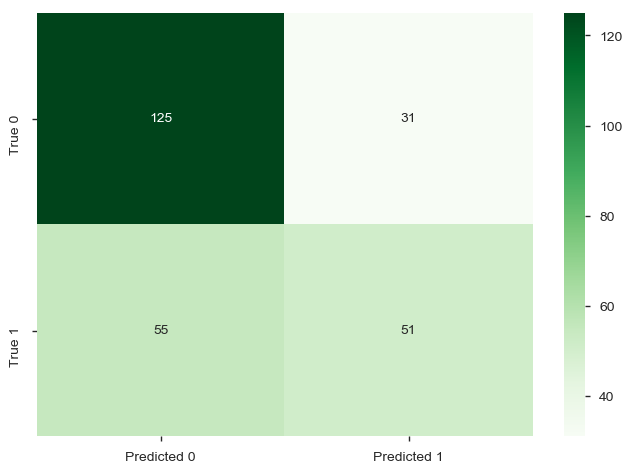

In [ ]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,predictions)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Greens", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()

## Hyper-parameters Optimization using Gridsearch and Crossvalidation

In [ ]:
svc = SVC()
svc.get_params()
param_grid = [{'C':[0.01,1,10,100,1000],
              'kernel':['linear','poly','rbf','sigmoid'],
              'gamma':[0.01,1,10,100,200]}]

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
'''model = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy')
model.fit(X_train, y_train)
model.best_params_
model.best_score_'''
#Committed the code it is taking to much time in compiling

"model = GridSearchCV(svc, param_grid, cv=10, scoring='accuracy')\nmodel.fit(X_train, y_train)\nmodel.best_params_\nmodel.best_score_"

## Random Forest

In [ ]:
radm_clf = RandomForestClassifier(max_depth = 3,n_estimators=100)
radm_clf.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( X_test ) } )

In [ ]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.8091603053435115

In [ ]:
radm_train_pred = pd.DataFrame( { 'actual':  y_train,
                            'predicted': radm_clf.predict( X_train ) } )

In [ ]:
metrics.accuracy_score( radm_train_pred.actual, radm_train_pred.predicted )

0.8099331423113658

In [ ]:
param_grid = {'max_depth': np.arange(3, 11),
             'max_features': np.arange(3,11)}

In [ ]:
ran_forest = GridSearchCV(RandomForestClassifier(), param_grid, cv = 10)
ran_forest.fit(X_train, y_train )

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10]), 'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
ran_forest.best_score_

0.8185291308500477

In [ ]:
ran_forest.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
ran_forest.best_params_

{'max_depth': 6, 'max_features': 8}

In [ ]:
ran_forest = RandomForestClassifier( max_depth = 8, max_features=7 )
ran_forest.fit( X_train, y_train )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
radm_test_pred = pd.DataFrame( { 'actual':  y_test,
                            'predicted': radm_clf.predict( X_test ) } )

In [ ]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.8091603053435115

## Evaluating a score by cross-validation using sklearn cross_val_score

In [ ]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def compute_precision(clf, X, y, scoring='precision'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

def compute_recall(clf, X, y, scoring='recall'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

#Accuracy scores from various models
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier(random_state=0, n_estimators=100,max_depth = 8, max_features=7)
gboost = GradientBoostingClassifier()
dtree = DecisionTreeClassifier(criterion="gini",max_depth=5)
svm = SVC()
naiveBayes = GaussianNB()

models = [logreg, logreg_cv, rf, gboost, dtree, svm, naiveBayes] 

In [ ]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_train, y=y_train, scoring='accuracy')
    precision = compute_precision(clf=model, X=X_train, y=y_train, scoring='precision')
    recall = compute_recall(clf=model, X=X_train, y=y_train, scoring='recall')
    print ('Accuracy score  = {0}'.format(score))
    print ('Precision score = {0}'.format(precision))
    print ('Recall score    = {0}'.format(recall))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegression'>
Accuracy score  = 0.8070018577913315
Precision score = 0.743325655700619
Recall score    = 0.7459915611814345
****
Cross-validation of : <class 'sklearn.linear_model.logistic.LogisticRegressionCV'>


In [ ]:
Image(url= "titanic_survived.jpg")

In [ ]:
Image(url= "titanic_survived1.jpg")

Millvina Dean — a name she used throughout her life, though she was christened Elizabeth Gladys Dean — spent her early years on a farm owned by her grandfather, a Southampton veterinarian.

She survived with her mother, Georgetta, and 2-year-old brother when they, like many other survivors, were picked up by the liner Carpathia and taken to New York.

Ms. Dean said all she knew of what happened during the sinking she had learned from her mother: “She told me that they heard a tremendous crash, and that my father went up on deck, then came back down again and said, ‘Get the children up and take them to the deck as soon as possible, because the ship has struck an iceberg.’ ”

Her father, Bertram Dean, was among more than 1,500 passengers and crew members who died in the sinking, a fact that Ms. Dean, in an interview at the Southampton nursing home last month, attributed partly to the fact that the Dean family was traveling in third class, or steerage, as the cheapest form of passage was known.
https://www.nytimes.com/2009/06/01/world/europe/01dean.html

### Below are the records as mentioned by Millvina Dean from our exisitng Dataset.

In [ ]:
titanicData[titanicData.name.isin(['Dean, Master. Bertram Vere','Dean, Miss. Elizabeth Gladys "Millvina"','Dean, Mr. Bertram Frank','Dean, Mrs. Bertram (Eva Georgetta Light)'
])]